In [2318]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = None
from matplotlib.colors import ListedColormap
sns.set(font_scale=2)
plt.rcParams['figure.figsize']=(20,20)
pd.set_option("display.precision", 5)

In [2319]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2320]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict,KFold,StratifiedKFold


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,\
BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score,\
roc_curve,roc_auc_score,cohen_kappa_score

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE

# Data Understanding

In [2321]:
df_insurance_claims = pd.read_csv('insurance_claims.csv')
df_insurance_claims.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [2322]:
df_insurance_claims = df_insurance_claims.loc[:,df_insurance_claims.columns != '_c39']
df_insurance_claims.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [2323]:
df_insurance_claims.shape

(1000, 39)

In [2324]:
pd.to_datetime(df_insurance_claims['incident_date']).dt.month.value_counts()

1    516
2    472
3     12
Name: incident_date, dtype: int64

In [2325]:
# There are 1000 rows and 39 columns

In [2326]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [2327]:
df_insurance_claims.isna().mean()

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

In [2328]:
# there is no null values present

In [2329]:
df_insurance_claims.describe()

months_as_customer         age  policy_number  policy_deductable  \
count          1000.00000  1000.00000     1000.00000         1000.00000   
mean            203.95400    38.94800   546238.64800         1136.00000   
std             115.11317     9.14029   257063.00528          611.86467   
min               0.00000    19.00000   100804.00000          500.00000   
25%             115.75000    32.00000   335980.25000          500.00000   
50%             199.50000    38.00000   533135.00000         1000.00000   
75%             276.25000    44.00000   759099.75000         2000.00000   
max             479.00000    64.00000   999435.00000         2000.00000   

       policy_annual_premium  umbrella_limit   insured_zip  capital-gains  \
count             1000.00000     1.00000e+03    1000.00000     1000.00000   
mean              1256.40615     1.10100e+06  501214.48800    25126.10000   
std                244.16739     2.29741e+06   71701.61094    27872.18771   
min                433.33000    -1.00000e+06  430104.00000        0.00000   
25%               1089.60750     0.00000e+00  448404.50000        0.00000   
50%               1257.20000     0.00000e+00  466445.50000        0.00000   
75%               1415.69500     0.00000e+00  603251.00000    51025.00000   
max               2047.59000     1.00000e+07  620962.00000   100500.00000   

       capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.00000                1000.00000                   1000.00000   
mean   -26793.70000                  11.64400                      1.83900   
std     28104.09669                   6.95137                      1.01888   
min   -111100.00000                   0.00000                      1.00000   
25%    -51500.00000                   6.00000                      1.00000   
50%    -23250.00000                  12.00000                      1.00000   
75%         0.00000                  17.00000                      3.00000   
max         0.00000                  23.00000                      4.00000   

       bodily_injuries   witnesses  total_claim_amount  injury_claim  \
count       1000.00000  1000.00000          1000.00000    1000.00000   
mean           0.99200     1.48700         52761.94000    7433.42000   
std            0.82013     1.11134         26401.53319    4880.95185   
min            0.00000     0.00000           100.00000       0.00000   
25%            0.00000     1.00000         41812.50000    4295.00000   
50%            1.00000     1.00000         58055.00000    6775.00000   
75%            2.00000     2.00000         70592.50000   11305.00000   
max            2.00000     3.00000        114920.00000   21450.00000   

       property_claim  vehicle_claim   auto_year  
count      1000.00000     1000.00000  1000.00000  
mean       7399.57000    37928.95000  2005.10300  
std        4824.72618    18886.25289     6.01586  
min           0.00000       70.00000  1995.00000  
25%        4445.00000    30292.50000  2000.00000  
50%        6750.00000    42100.00000  2005.00000  
75%       10885.00000    50822.50000  2010.00000  
max       23670.00000    79560.00000  2015.00000

# Data Cleaning

In [2330]:
df_insurance_claims[df_insurance_claims.duplicated()]

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

In [2331]:
# There is no duplicated rows

In [2332]:
df_insurance_claims['fraud_reported'] = df_insurance_claims['fraud_reported'].replace({'Y':1,'N':0})
df_insurance_claims['fraud_reported'][0:5]

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [2333]:
# converted target variable Y as 1 and N as 0.

In [2334]:
df_insurance_claims.nunique() # number of unique items in each columns

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [2335]:
# we can see that policy_number,incident_location,incident_date,policy_bind_date,incident_hour_of_the_day are having high unique value
#  and these columns is looking like insignificant so we are dropping them

In [2336]:
df_insurance_claims.drop(['incident_location','policy_number','incident_date','policy_bind_date','incident_hour_of_the_day','auto_model'],axis=1,inplace=True)

## Split features and Target

In [2337]:
X = df_insurance_claims.drop(['fraud_reported'],axis=1)
y = df_insurance_claims['fraud_reported']

# EDA

### spliting feature into numerical and categorical

In [2338]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object_)

In [2339]:
for i in X_cat.columns:
    print(X_cat[i].nunique())
    print("***********************")

3
***********************
3
***********************
2
***********************
7
***********************
14
***********************
20
***********************
6
***********************
4
***********************
4
***********************
4
***********************
5
***********************
7
***********************
7
***********************
3
***********************
3
***********************
14
***********************


In [2340]:
for i in X_cat.columns:
    print(i)
    print(X_cat[i].unique())
    print("***********************")

policy_state
['OH' 'IN' 'IL']
***********************
policy_csl
['250/500' '100/300' '500/1000']
***********************
insured_sex
['MALE' 'FEMALE']
***********************
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
***********************
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
***********************
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
***********************
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
***********************
incident_type
['Single Vehicle Collision' '

In [2341]:
# There is ? value for column property_damage,police_report_available,collision_type

In [2342]:
X_cat.replace(to_replace='?',value=np.NaN,inplace=True)

In [2343]:
for i in X_cat.columns:
    print(i)
    print(X_cat[i].unique())
    print("***********************")

policy_state
['OH' 'IN' 'IL']
***********************
policy_csl
['250/500' '100/300' '500/1000']
***********************
insured_sex
['MALE' 'FEMALE']
***********************
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
***********************
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
***********************
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
***********************
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
***********************
incident_type
['Single Vehicle Collision' '

In [2344]:
X_cat.isna().sum()

policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
property_damage            360
police_report_available    343
auto_make                    0
dtype: int64

In [2345]:
X_cat['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

In [2346]:
X_cat['property_damage'].value_counts(dropna=False)

NaN    360
NO     338
YES    302
Name: property_damage, dtype: int64

In [2347]:
X_cat['police_report_available'].value_counts(dropna=False)

NaN    343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [2348]:
# dropping property_damage and police_report_available columns 

# Data Visualization For Categorical Columns

In [2349]:
X_cat['collision_type'] = X_cat['collision_type'].fillna(X_cat['collision_type'].mode()[0])

In [2350]:
X_cat =  X_cat.drop(['property_damage','police_report_available'],axis=1)
X_cat.head()

policy_state policy_csl insured_sex insured_education_level  \
0           OH    250/500        MALE                      MD   
1           IN    250/500        MALE                      MD   
2           OH    100/300      FEMALE                     PhD   
3           IL    250/500      FEMALE                     PhD   
4           IL   500/1000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  \
0       craft-repair        sleeping              husband   
1  machine-op-inspct         reading       other-relative   
2              sales     board-games            own-child   
3       armed-forces     board-games            unmarried   
4              sales     board-games            unmarried   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  auto_make  
0                Police             SC      Columbus       Saab  
1                Police             VA     Riverwood   Mercedes  
2                Police             NY      Columbus      Dodge  
3                Police             OH     Arlington  Chevrolet  
4                  None             NY     Arlington     Accura

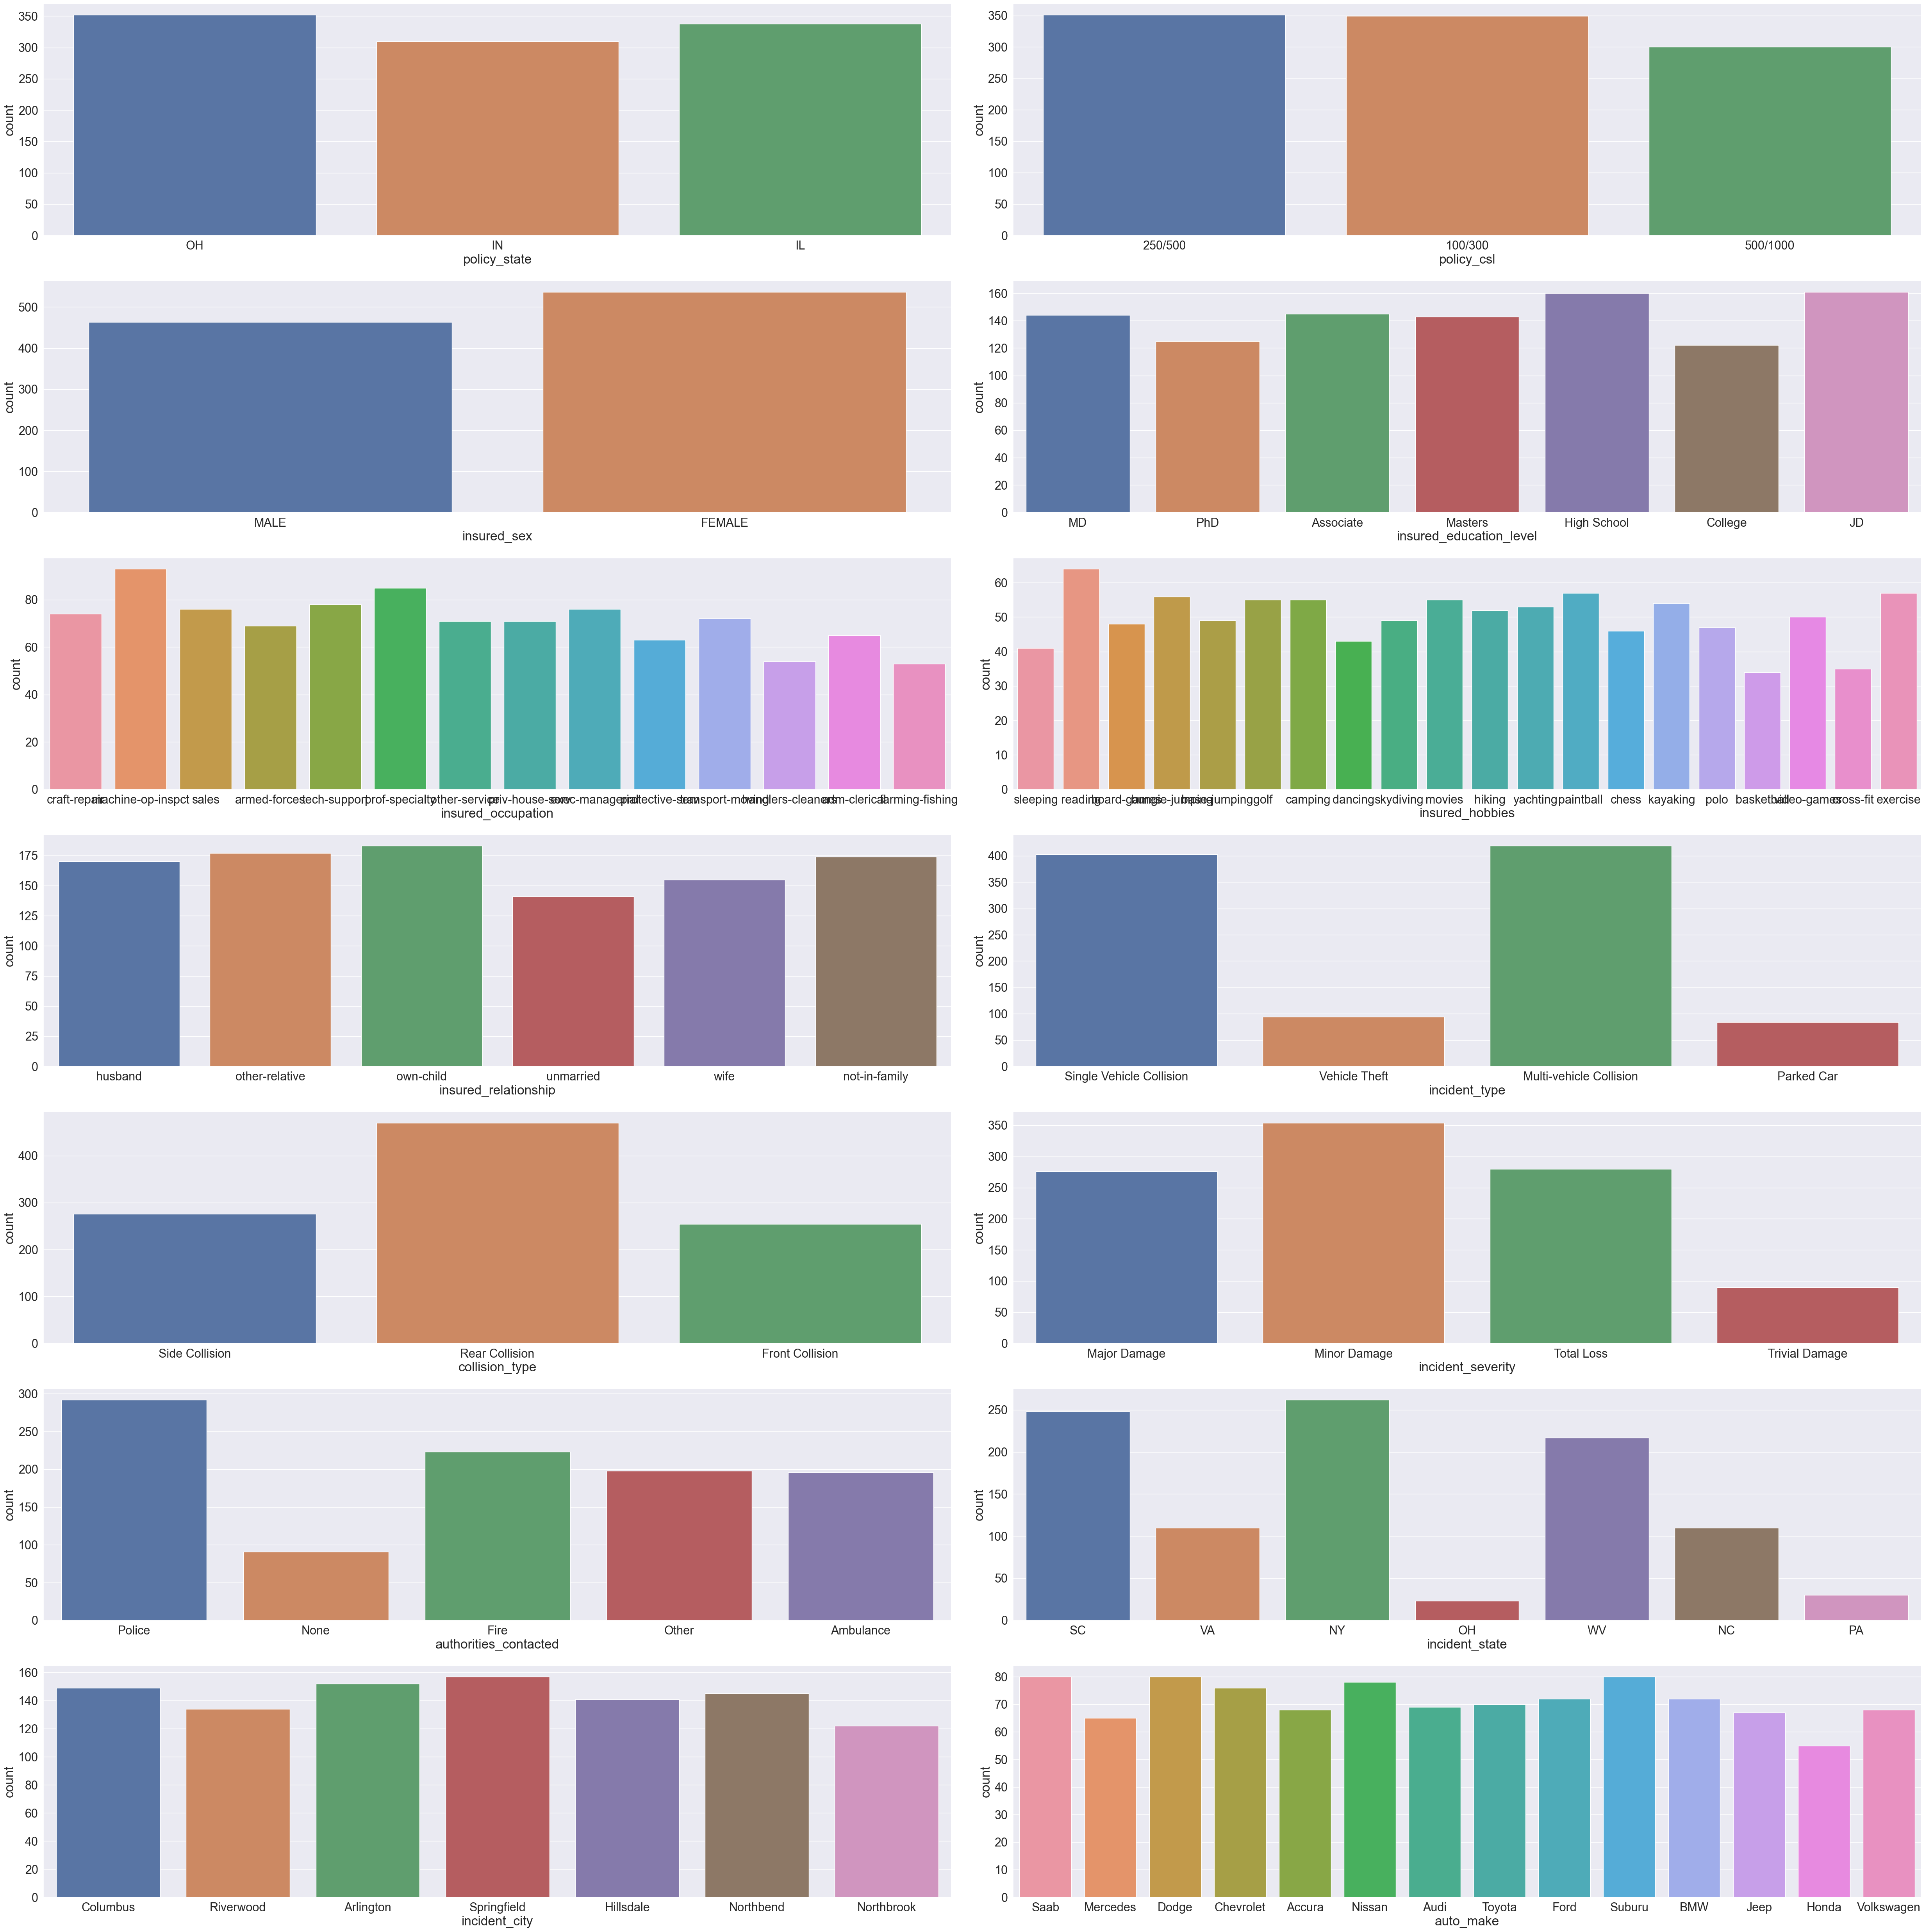

In [2351]:
fig,ax = plt.subplots(nrows=7,ncols=2,figsize=(50,50))

for col,subplot in zip(X_cat.columns,ax.flatten()):
    sns.countplot(x=X_cat[col],ax=subplot)
plt.tight_layout()
plt.show()

In [2352]:
# Features are fairly balanced.

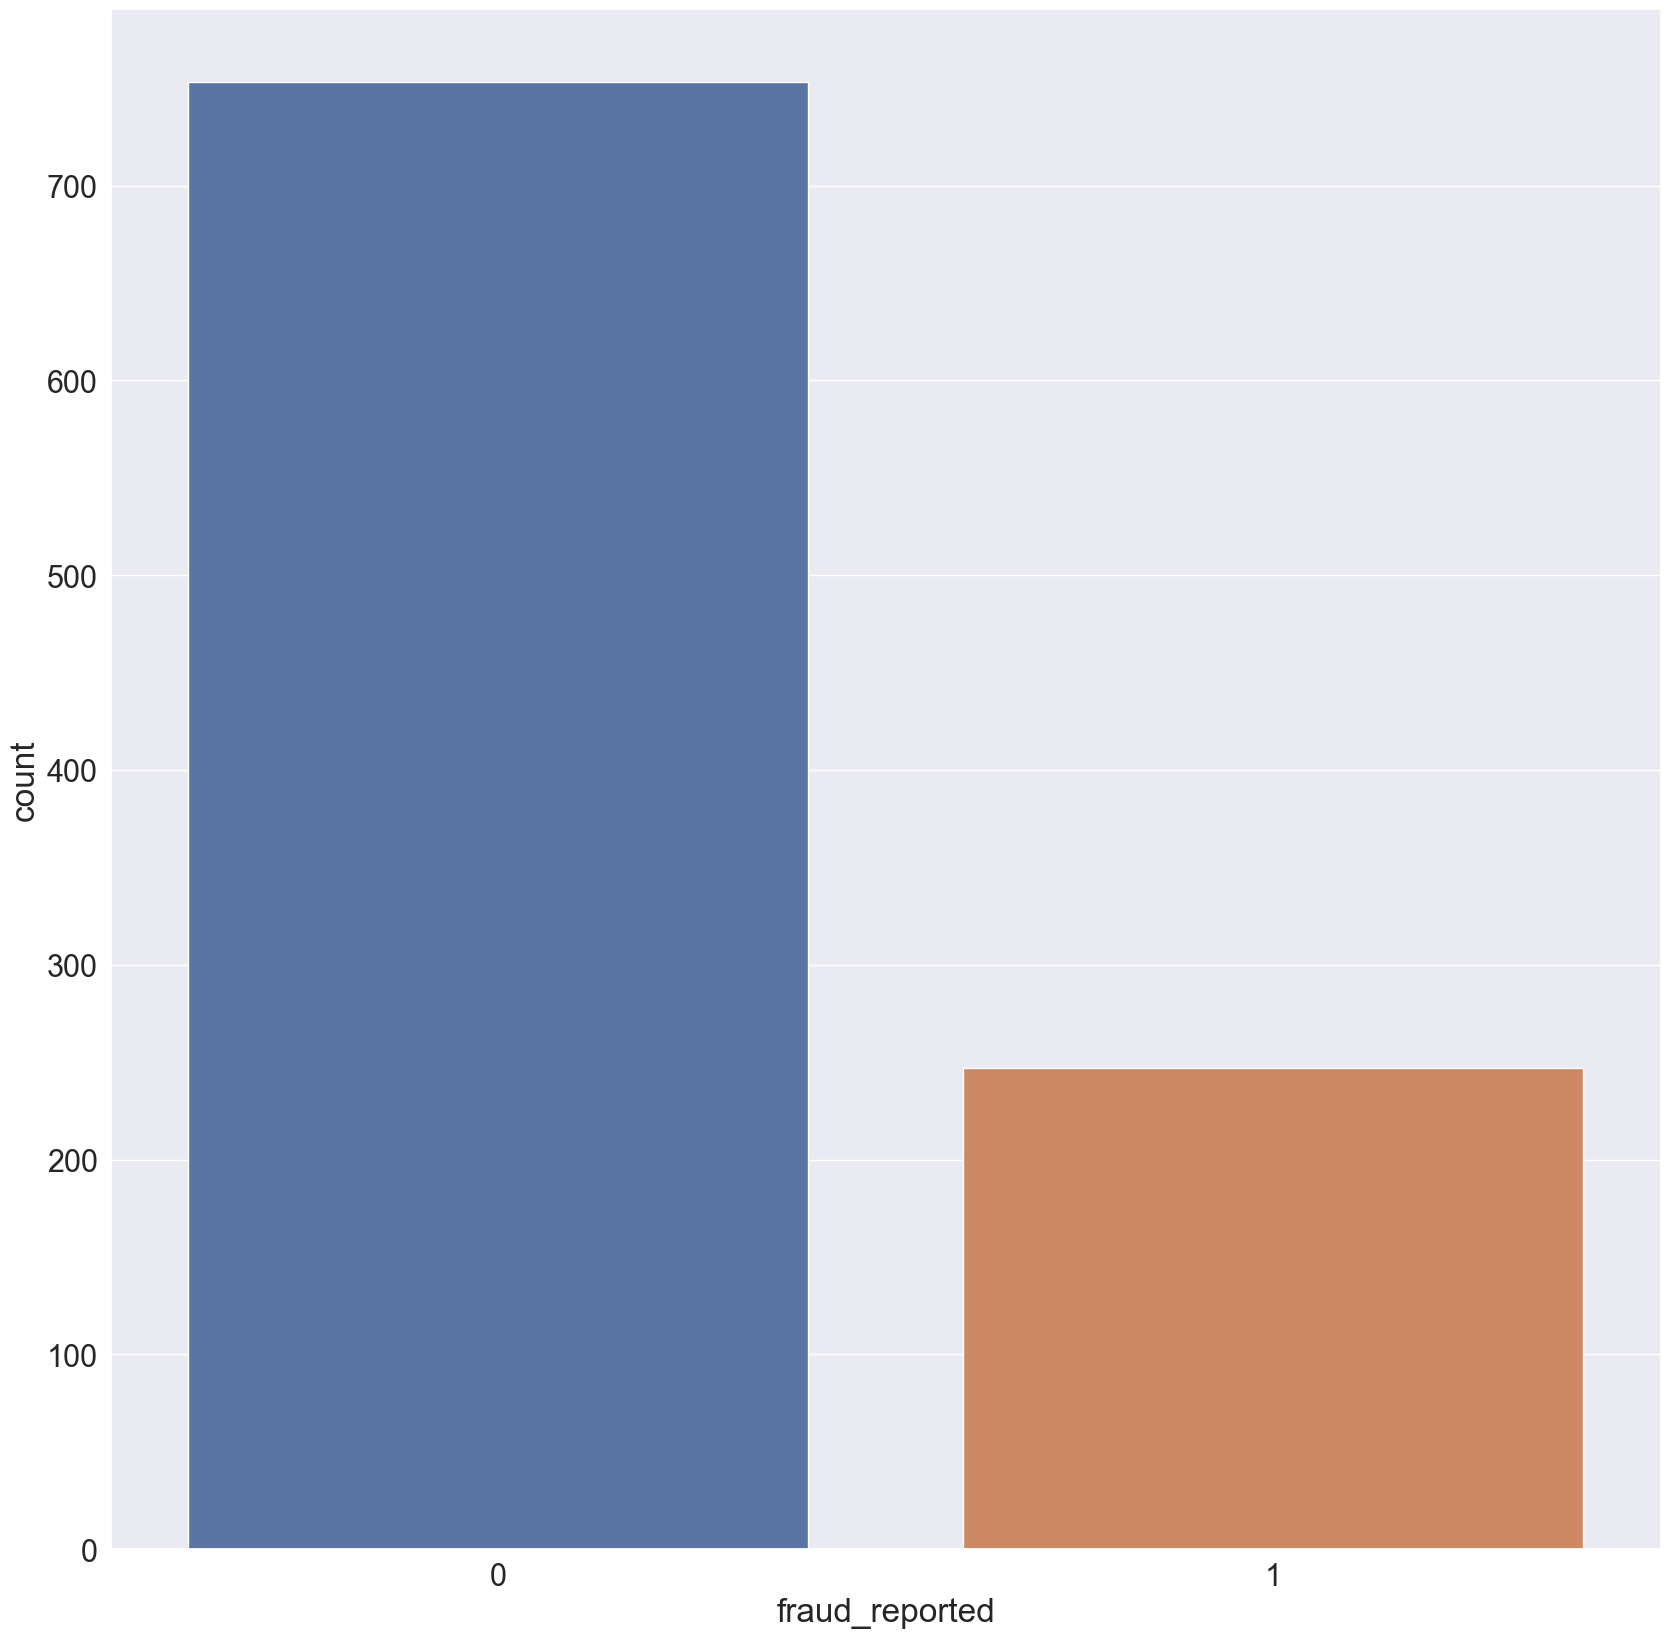

In [2353]:
sns.countplot(x=y);

In [2354]:
# Target column is imbalanced.

# Data Preprocessing

In [2355]:
le = LabelEncoder()

for i in X_cat.columns:
    label = le.fit_transform(X_cat[i])
    X_cat[i] = label
X_cat.head(2)

policy_state  policy_csl  insured_sex  insured_education_level  \
0             2           1            1                        4   
1             1           1            1                        4   

   insured_occupation  insured_hobbies  insured_relationship  incident_type  \
0                   2               17                     0              2   
1                   6               15                     2              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   

   incident_city  auto_make  
0              1         10  
1              5          8

In [2356]:
X_num.head(2)

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0               0       466132          53300             0   
1         5000000       468176              0             0   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                            1                1          2   
1                            1                0          0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  
0               71610          6510           13020          52080       2004  
1                5070           780             780           3510       2007

In [2357]:
X_num.skew()

months_as_customer             0.36218
age                            0.47899
policy_deductable              0.47789
policy_annual_premium          0.00440
umbrella_limit                 1.80671
insured_zip                    0.81655
capital-gains                  0.47885
capital-loss                  -0.39147
number_of_vehicles_involved    0.50266
bodily_injuries                0.01478
witnesses                      0.01964
total_claim_amount            -0.59458
injury_claim                   0.26481
property_claim                 0.37817
vehicle_claim                 -0.62110
auto_year                     -0.04829
dtype: float64

In [2358]:
#X_num['umbrella_limit'] = np.power((X_num['umbrella_limit']),3)

In [2359]:
#X_num['umbrella_limit'] 

In [2360]:
# normalize the numerical value

In [2361]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(scaled,columns=X_num.columns)
X_num_scaled.head()

months_as_customer      age  policy_deductable  policy_annual_premium  \
0             0.68476  0.64444            0.33333                0.60311   
1             0.47599  0.51111            1.00000                0.47321   
2             0.27975  0.22222            1.00000                0.60697   
3             0.53445  0.48889            1.00000                0.60858   
4             0.47599  0.55556            0.33333                0.71276   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0         0.09091      0.18877        0.53035       1.00000   
1         0.54545      0.19948        0.00000       1.00000   
2         0.54545      0.00277        0.34925       1.00000   
3         0.63636      0.93270        0.48657       0.43834   
4         0.63636      0.94626        0.65672       0.58596   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                      0.00000              0.5    0.66667   
1                      0.00000              0.0    0.00000   
2                      0.66667              1.0    1.00000   
3                      0.00000              0.5    0.66667   
4                      0.00000              0.0    0.33333   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  
0             0.62280       0.30350         0.55006        0.65430       0.45  
1             0.04329       0.03636         0.03295        0.04328       0.60  
2             0.30091       0.35897         0.16265        0.28972       0.60  
3             0.55130       0.29557         0.26785        0.63719       0.95  
4             0.05574       0.06061         0.02746        0.05636       0.70

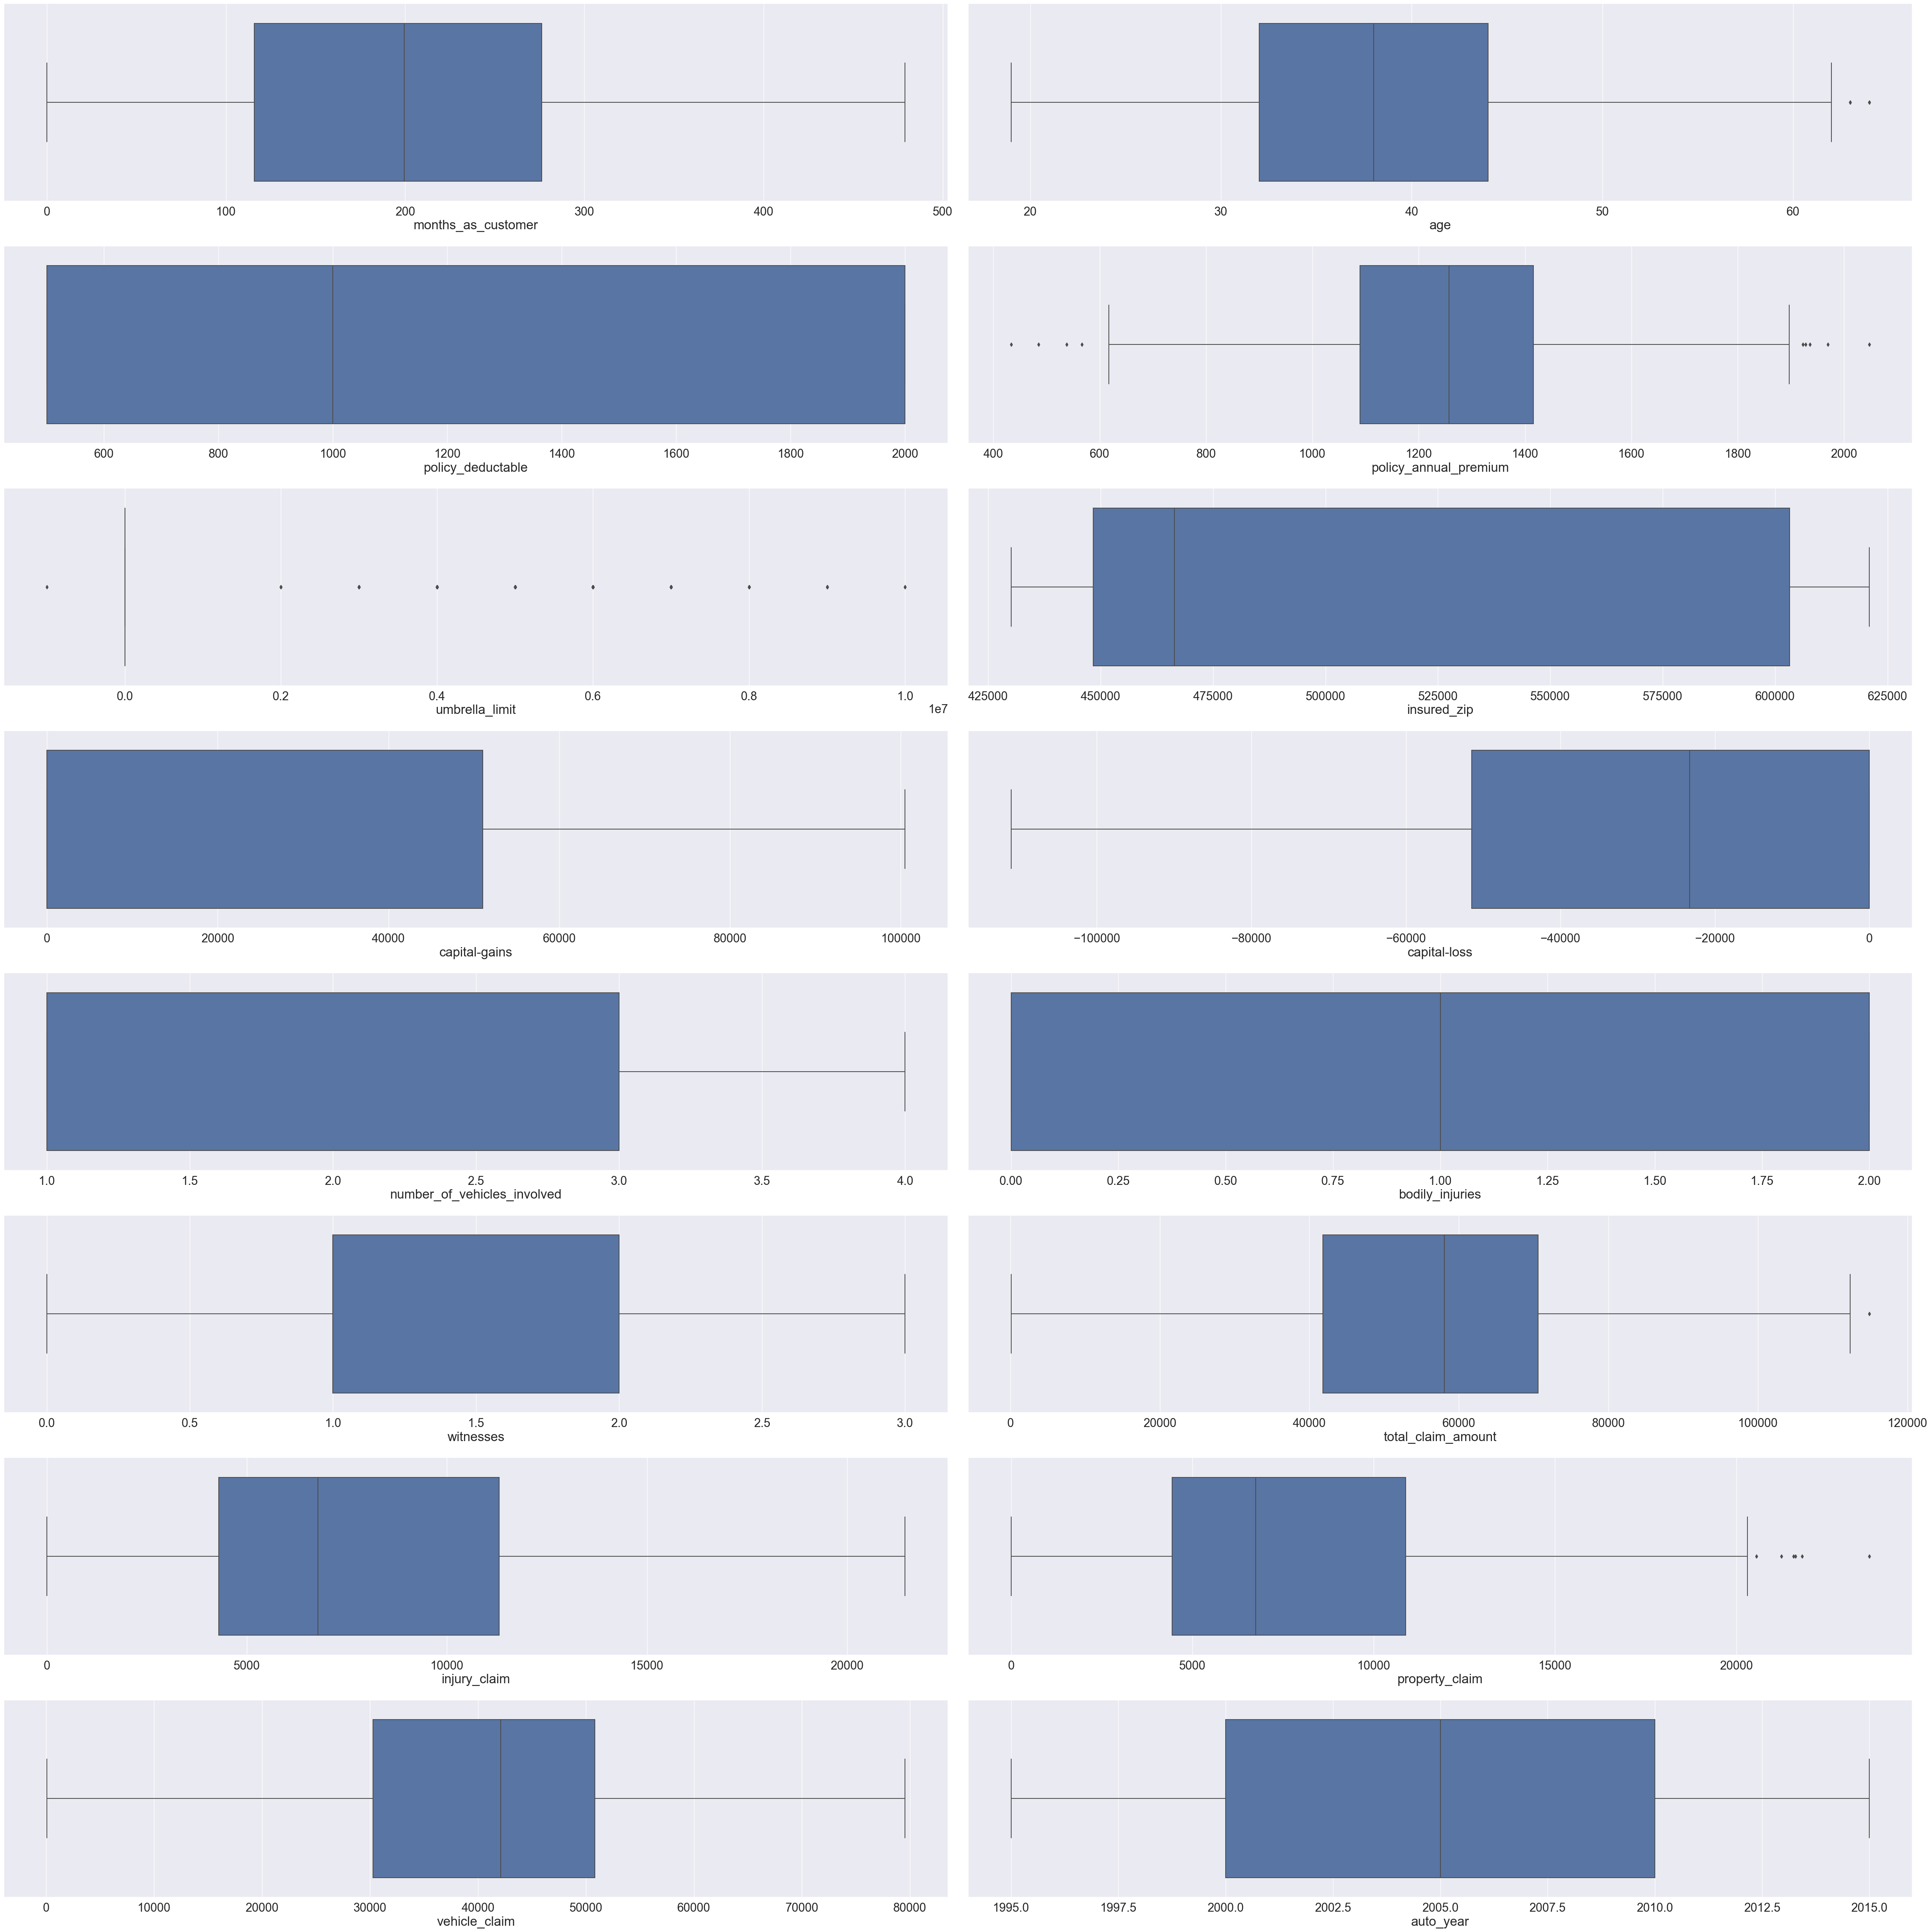

In [2362]:
fig,ax = plt.subplots(nrows=8,ncols=2,figsize=(50,50),squeeze=True)

for col,subplot in zip(X_num.columns,ax.flatten()):
    sns.boxplot(x=X_num[col],ax=subplot)
plt.tight_layout()
plt.show()

In [2363]:
# There are outliers present for columns  policy_annual_premium,umbrella_limit and property_claim columns

In [2364]:
X_num_scaled.skew()

months_as_customer             0.36218
age                            0.47899
policy_deductable              0.47789
policy_annual_premium          0.00440
umbrella_limit                 1.80671
insured_zip                    0.81655
capital-gains                  0.47885
capital-loss                  -0.39147
number_of_vehicles_involved    0.50266
bodily_injuries                0.01478
witnesses                      0.01964
total_claim_amount            -0.59458
injury_claim                   0.26481
property_claim                 0.37817
vehicle_claim                 -0.62110
auto_year                     -0.04829
dtype: float64

In [2365]:
# umbrella_limit column is right skewed is due to high outliers

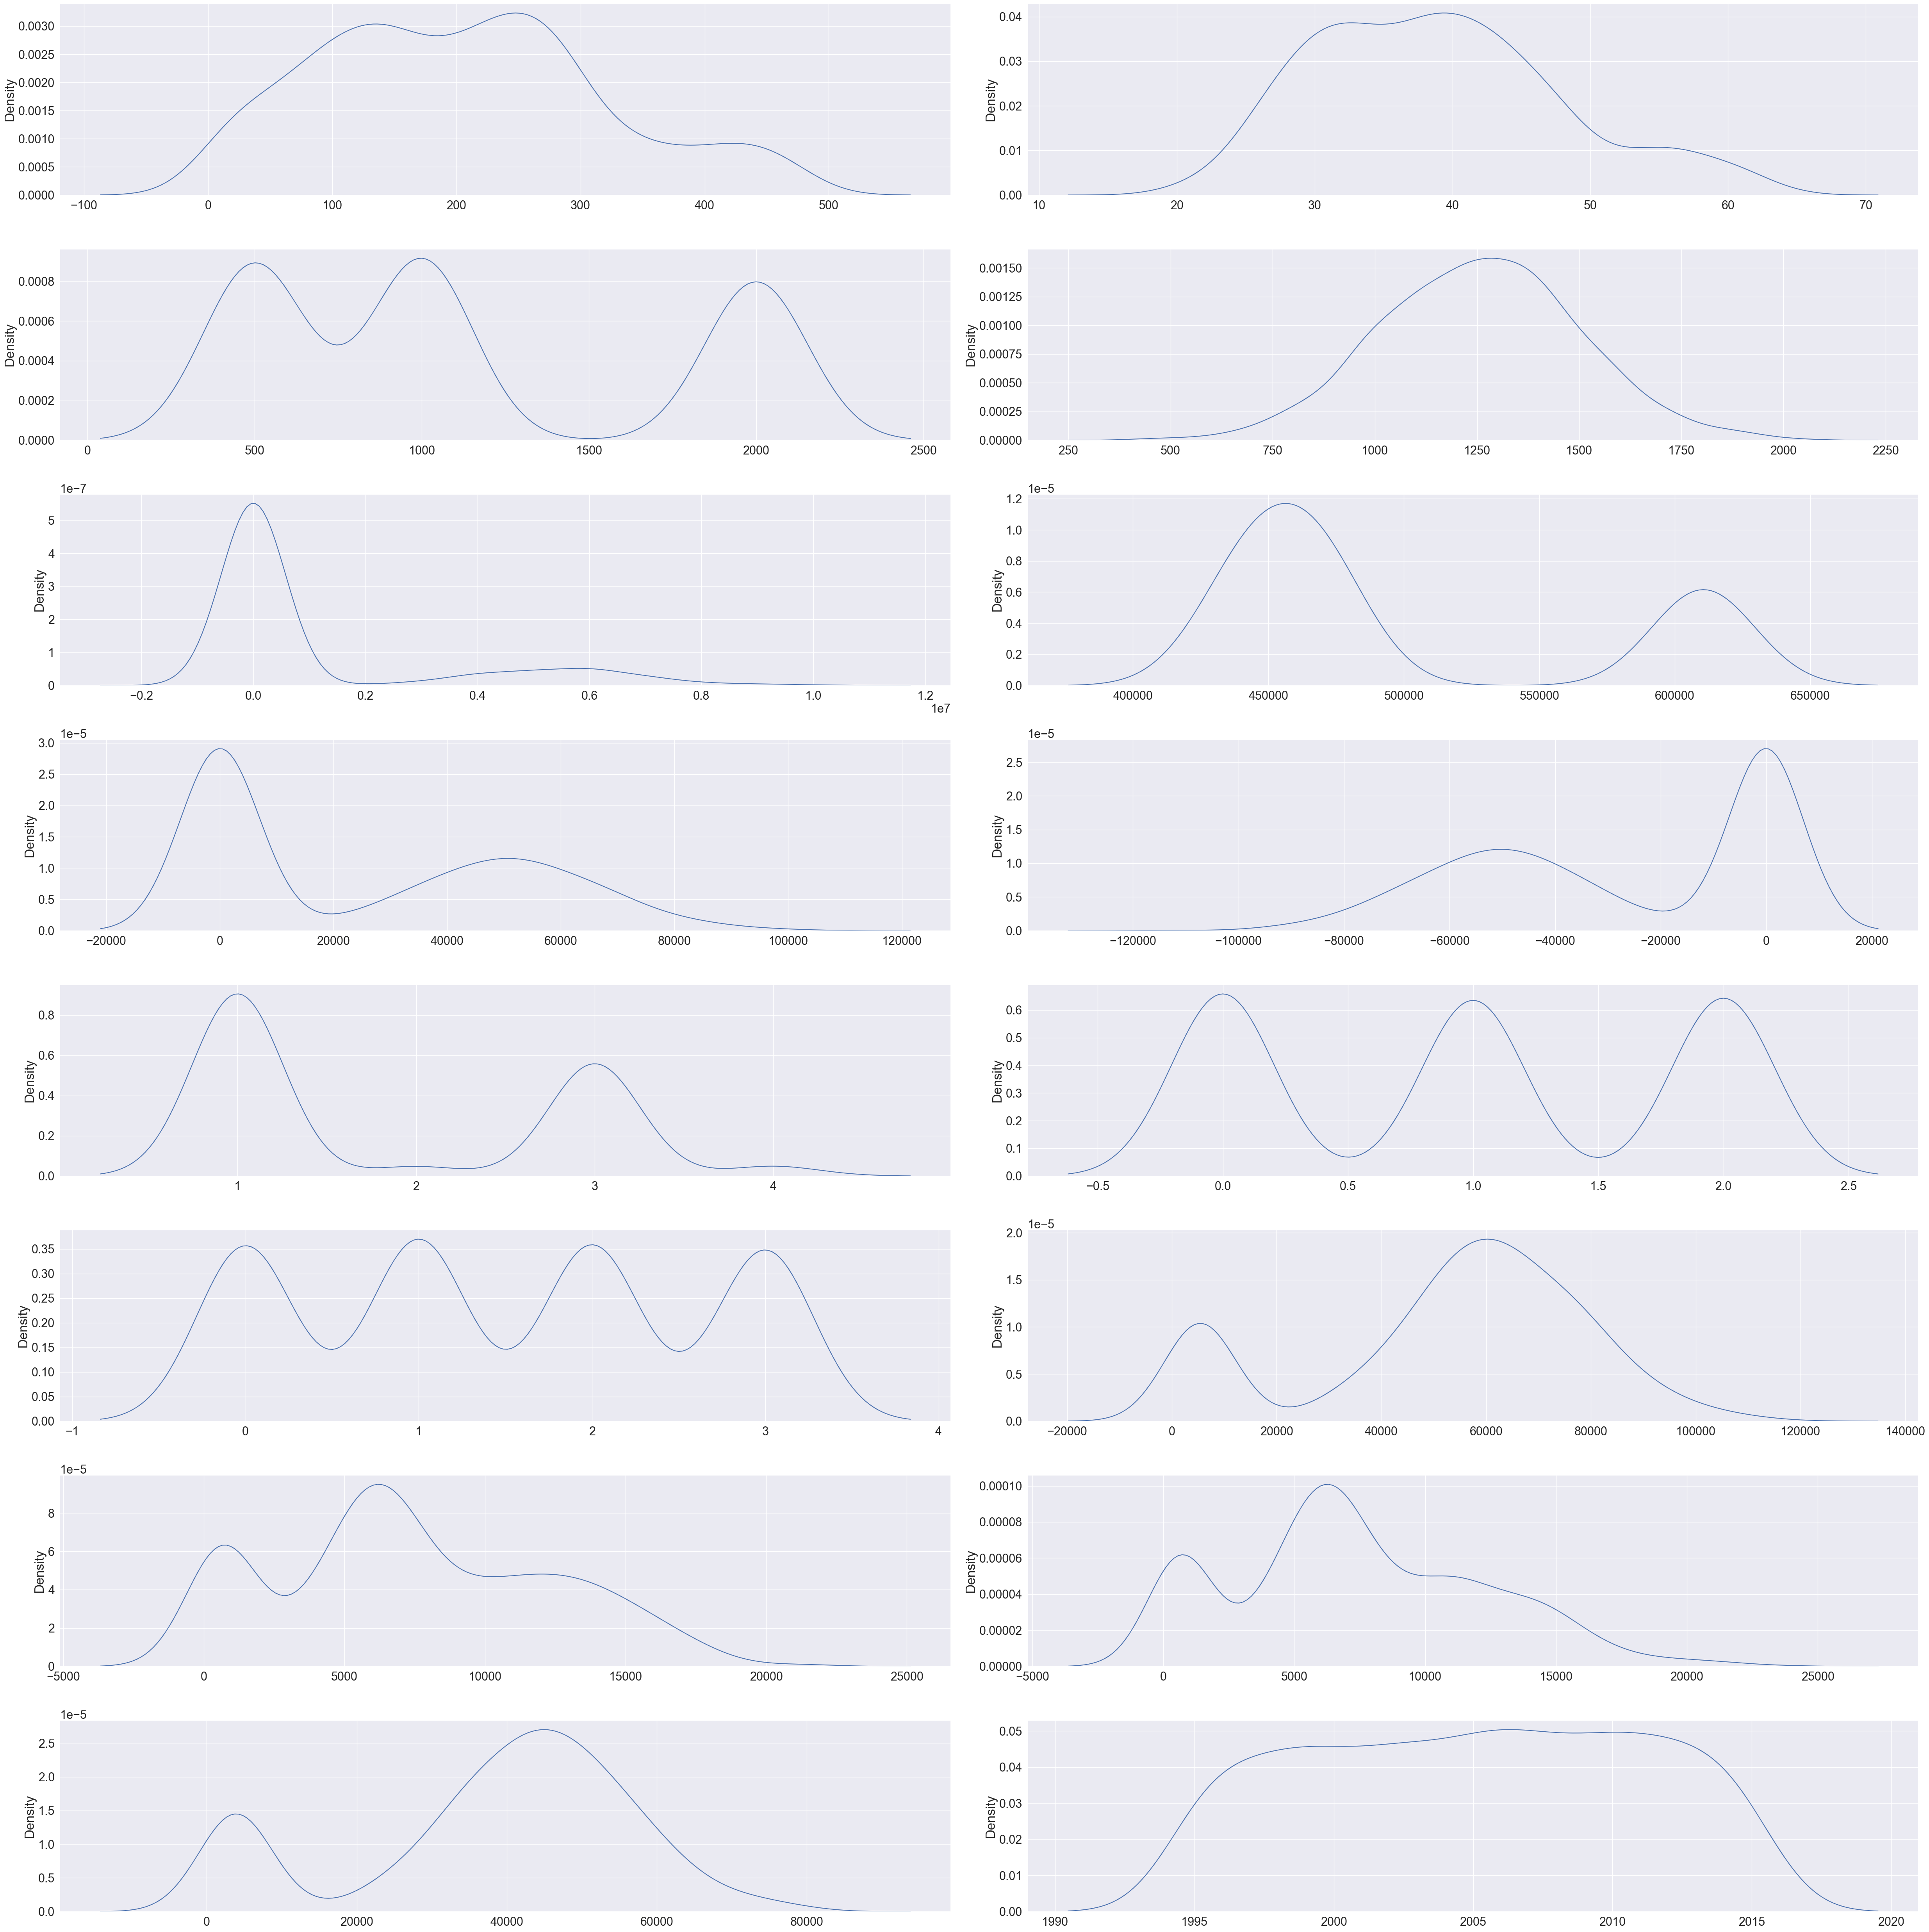

In [2366]:
fig,ax = plt.subplots(nrows=8,ncols=2,figsize=(50,50),squeeze=True)

for col,subplot in zip(X_num.columns,ax.flatten()):
    sns.distplot(x=X_num[col],ax=subplot,hist=False)
plt.tight_layout()
plt.show()

In [2367]:
X_new = pd.concat([X_num_scaled,X_cat],axis=1)
X_new.head()

months_as_customer      age  policy_deductable  policy_annual_premium  \
0             0.68476  0.64444            0.33333                0.60311   
1             0.47599  0.51111            1.00000                0.47321   
2             0.27975  0.22222            1.00000                0.60697   
3             0.53445  0.48889            1.00000                0.60858   
4             0.47599  0.55556            0.33333                0.71276   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0         0.09091      0.18877        0.53035       1.00000   
1         0.54545      0.19948        0.00000       1.00000   
2         0.54545      0.00277        0.34925       1.00000   
3         0.63636      0.93270        0.48657       0.43834   
4         0.63636      0.94626        0.65672       0.58596   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                      0.00000              0.5    0.66667   
1                      0.00000              0.0    0.00000   
2                      0.66667              1.0    1.00000   
3                      0.00000              0.5    0.66667   
4                      0.00000              0.0    0.33333   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  \
0             0.62280       0.30350         0.55006        0.65430       0.45   
1             0.04329       0.03636         0.03295        0.04328       0.60   
2             0.30091       0.35897         0.16265        0.28972       0.60   
3             0.55130       0.29557         0.26785        0.63719       0.95   
4             0.05574       0.06061         0.02746        0.05636       0.70   

   policy_state  policy_csl  insured_sex  insured_education_level  \
0             2           1            1                        4   
1             1           1            1                        4   
2             2           0            0                        6   
3             0           1            0                        6   
4             0           2            1                        0   

   insured_occupation  insured_hobbies  insured_relationship  incident_type  \
0                   2               17                     0              2   
1                   6               15                     2              3   
2                  11                2                     3              0   
3                   1                2                     4              2   
4                  11                2                     4              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  auto_make  
0              1         10  
1              5          8  
2              1          4  
3              0          3  
4              0          0

In [2368]:
df_insurance_claims_new = pd.concat([X_new,y],axis=1)
df_insurance_claims_new.head(2)

months_as_customer      age  policy_deductable  policy_annual_premium  \
0             0.68476  0.64444            0.33333                0.60311   
1             0.47599  0.51111            1.00000                0.47321   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0         0.09091      0.18877        0.53035           1.0   
1         0.54545      0.19948        0.00000           1.0   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                          0.0              0.5    0.66667   
1                          0.0              0.0    0.00000   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  \
0             0.62280       0.30350         0.55006        0.65430       0.45   
1             0.04329       0.03636         0.03295        0.04328       0.60   

   policy_state  policy_csl  insured_sex  insured_education_level  \
0             2           1            1                        4   
1             1           1            1                        4   

   insured_occupation  insured_hobbies  insured_relationship  incident_type  \
0                   2               17                     0              2   
1                   6               15                     2              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   

   incident_city  auto_make  fraud_reported  
0              1         10               1  
1              5          8               1

In [2369]:
df_insurance_claims_new.corr()

months_as_customer      age  policy_deductable  \
months_as_customer                      1.00000  0.92210            0.02681   
age                                     0.92210  1.00000            0.02919   
policy_deductable                       0.02681  0.02919            1.00000   
policy_annual_premium                   0.00502  0.01440           -0.00325   
umbrella_limit                          0.01550  0.01813            0.01087   
insured_zip                             0.01789  0.02560            0.00454   
capital-gains                           0.00640 -0.00708            0.03521   
capital-loss                            0.02021  0.00737           -0.02354   
number_of_vehicles_involved             0.01474  0.02210            0.05121   
bodily_injuries                        -0.01016 -0.01568           -0.02276   
witnesses                               0.05838  0.05236            0.06664   
total_claim_amount                      0.06211  0.06986            0.02284   
injury_claim                            0.06533  0.07552            0.03911   
property_claim                          0.03494  0.06090            0.06479   
vehicle_claim                           0.06101  0.06259            0.00527   
auto_year                              -0.00029  0.00135            0.02610   
policy_state                           -0.00033 -0.01453            0.01003   
policy_csl                             -0.02682 -0.01518            0.00338   
insured_sex                             0.06093  0.07334           -0.00973   
insured_education_level                -0.00083  0.00097            0.01522   
insured_occupation                      0.00981  0.01722           -0.04673   
insured_hobbies                        -0.09366 -0.08132            0.00406   
insured_relationship                    0.06973  0.07483           -0.02294   
incident_type                          -0.01738 -0.02563           -0.03841   
collision_type                         -0.07279 -0.07564           -0.05391   
incident_severity                      -0.05958 -0.05844           -0.01571   
authorities_contacted                   0.01002  0.01542           -0.00076   
incident_state                          0.00537  0.00577            0.00652   
incident_city                          -0.00013 -0.00229           -0.04512   
auto_make                               0.04766  0.03041           -0.03538   
fraud_reported                          0.02054  0.01214            0.01482   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                         0.00502         0.01550   
age                                        0.01440         0.01813   
policy_deductable                         -0.00325         0.01087   
policy_annual_premium                      1.00000        -0.00625   
umbrella_limit                            -0.00625         1.00000   
insured_zip                                0.03235         0.01967   
capital-gains                             -0.01374        -0.04727   
capital-loss                               0.02355        -0.02406   
number_of_vehicles_involved               -0.04599        -0.02127   
bodily_injuries                            0.02678         0.02274   
witnesses                                  0.00233        -0.00674   
total_claim_amount                         0.00909        -0.04034   
injury_claim                              -0.01763        -0.04541   
property_claim                            -0.01165        -0.02379   
vehicle_claim                              0.02025        -0.03858   
auto_year                                 -0.04923         0.00989   
policy_state                               0.01246        -0.02958   
policy_csl                                 0.02398         0.02164   
insured_sex                                0.03885         0.01069   
insured_education_level                   -0.01972        -0.01936   
insured_occupation            

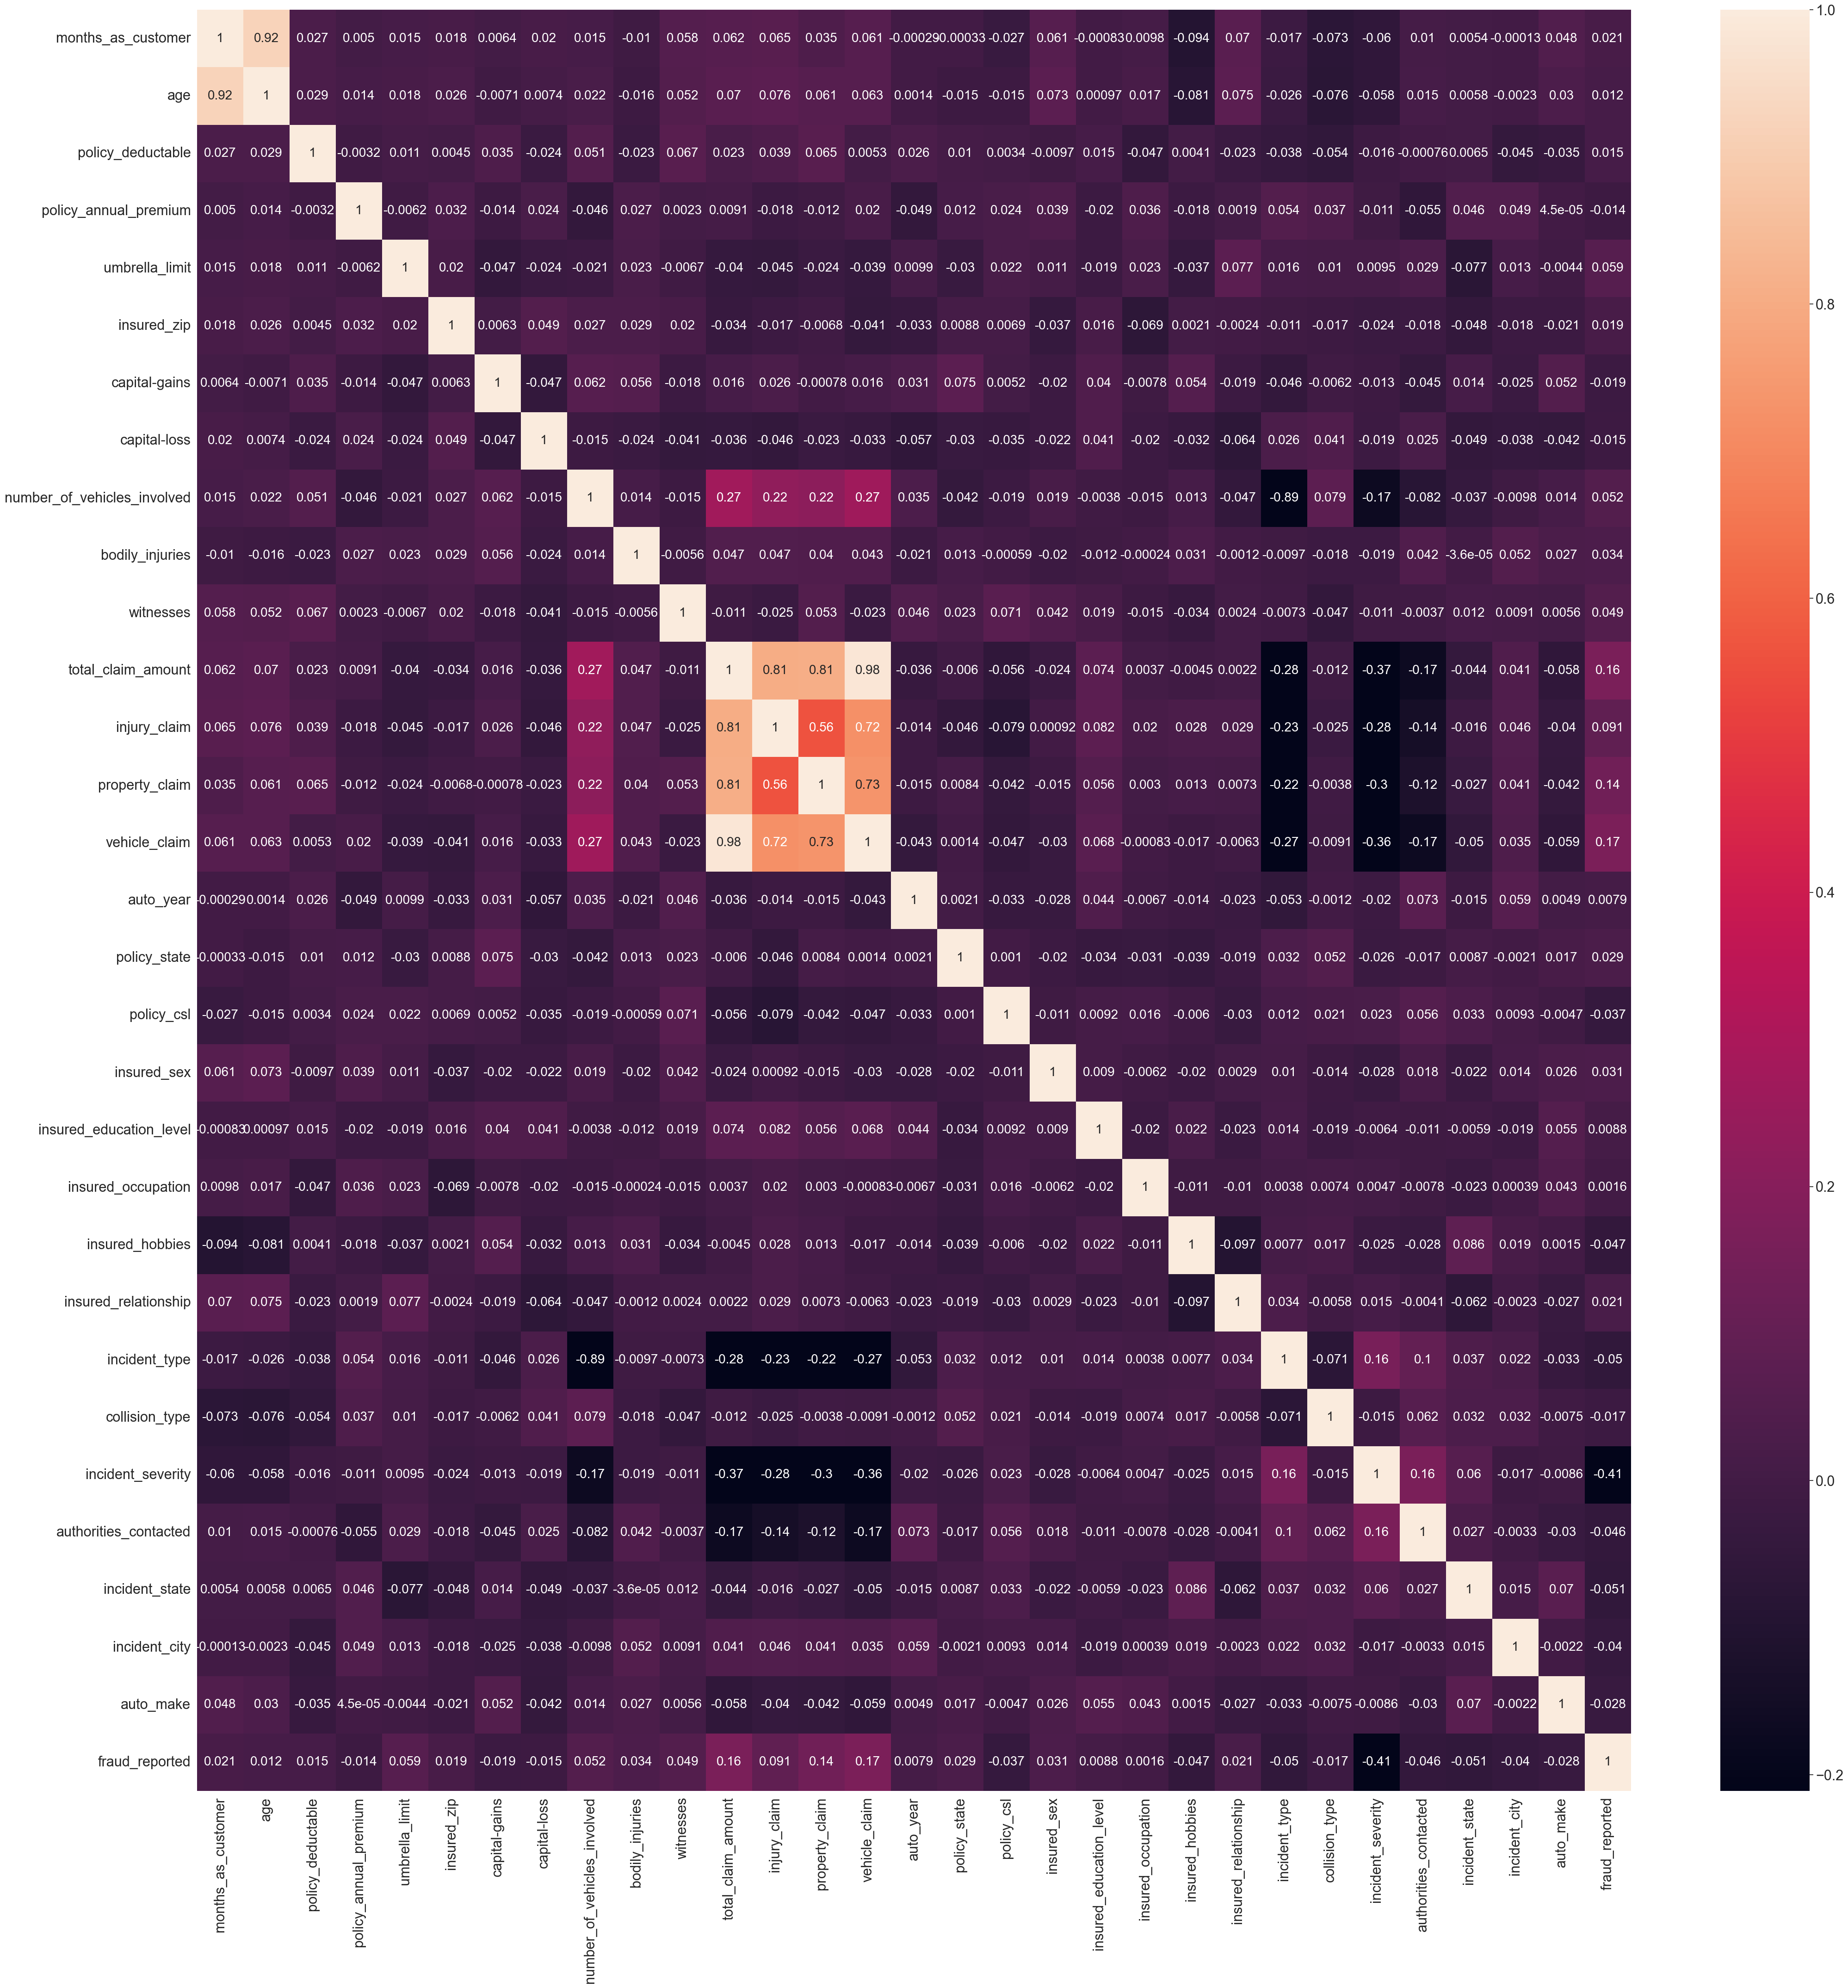

In [2370]:
plt.figure(figsize=(50,50))
sns.heatmap(df_insurance_claims_new.corr(),annot=True,fmt='.2g',annot_kws={'size':20},robust=True);

In [2371]:
# We can see the there some high correlation between some indenpendent variable so there is chance of multicolinearity
# Let check with VIF

In [2372]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif['Feature'] = X_new.columns
vif.sort_values(by='VIF',ascending=False)

VIF                      Feature
11  3.51514e+08           total_claim_amount
14  1.81286e+08                vehicle_claim
12  8.00917e+06                 injury_claim
13  7.90364e+06               property_claim
0   6.82458e+00           months_as_customer
1   6.82113e+00                          age
23  5.08681e+00                incident_type
8   5.08571e+00  number_of_vehicles_involved
25  1.19308e+00            incident_severity
26  1.07656e+00        authorities_contacted
21  1.04332e+00              insured_hobbies
27  1.04032e+00               incident_state
22  1.03860e+00         insured_relationship
10  1.03705e+00                    witnesses
7   1.03699e+00                 capital-loss
15  1.03654e+00                    auto_year
24  1.03573e+00               collision_type
29  1.03291e+00                    auto_make
6   1.03168e+00                capital-gains
2   1.03051e+00            policy_deductable
3   1.02802e+00        policy_annual_premium
16  1.02650e+00                 policy_state
5   1.02575e+00                  insured_zip
18  1.02513e+00                  insured_sex
19  1.02507e+00      insured_education_level
17  1.02337e+00                   policy_csl
4   1.02213e+00               umbrella_limit
28  1.02075e+00                incident_city
9   1.01918e+00              bodily_injuries
20  1.01716e+00           insured_occupation

In [2373]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['injury_claim'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                      Feature
11  317.34958           total_claim_amount
13  235.68491                vehicle_claim
1    38.50982                          age
0    28.11494           months_as_customer
12   15.53641               property_claim
3    11.51286        policy_annual_premium
22    9.04551                incident_type
7     8.89782                 capital-loss
8     7.14555  number_of_vehicles_involved
20    3.91075              insured_hobbies
14    3.73493                    auto_year
19    3.66615           insured_occupation
28    3.59654                    auto_make
18    3.36860      insured_education_level
26    3.32480               incident_state
25    3.18350        authorities_contacted
27    3.13481                incident_city
21    3.03893         insured_relationship
23    3.02916               collision_type
24    2.87864            incident_severity
10    2.82617                    witnesses
15    2.49139                 policy_state
9     2.48906              bodily_injuries
16    2.41361                   policy_csl
2     2.11597            policy_deductable
5     2.01306                  insured_zip
17    1.89632                  insured_sex
6     1.86185                capital-gains
4     1.85482               umbrella_limit

In [2374]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['injury_claim','total_claim_amount'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                      Feature
1   38.47448                          age
0   28.10769           months_as_customer
3   11.48904        policy_annual_premium
12  11.35065                vehicle_claim
21   9.04308                incident_type
7    8.89187                 capital-loss
11   7.49933               property_claim
8    7.14546  number_of_vehicles_involved
19   3.89921              insured_hobbies
13   3.73366                    auto_year
18   3.66062           insured_occupation
27   3.59647                    auto_make
17   3.36106      insured_education_level
25   3.32076               incident_state
24   3.18168        authorities_contacted
26   3.13135                incident_city
20   3.02923         insured_relationship
22   3.02828               collision_type
23   2.87809            incident_severity
10   2.82488                    witnesses
9    2.48748              bodily_injuries
14   2.48139                 policy_state
15   2.40467                   policy_csl
2    2.11112            policy_deductable
5    2.01210                  insured_zip
16   1.89428                  insured_sex
6    1.86136                capital-gains
4    1.85331               umbrella_limit

In [2375]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['injury_claim','total_claim_amount','months_as_customer'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                      Feature
2   11.45698        policy_annual_premium
11  11.31881                vehicle_claim
20   9.03918                incident_type
6    8.89043                 capital-loss
10   7.43726               property_claim
7    7.13945  number_of_vehicles_involved
0    5.74261                          age
18   3.88342              insured_hobbies
12   3.73159                    auto_year
17   3.65744           insured_occupation
26   3.59134                    auto_make
16   3.36014      insured_education_level
24   3.32063               incident_state
23   3.18094        authorities_contacted
25   3.13132                incident_city
19   3.02871         insured_relationship
21   3.02765               collision_type
22   2.87408            incident_severity
9    2.82275                    witnesses
8    2.48744              bodily_injuries
13   2.48069                 policy_state
14   2.39992                   policy_csl
1    2.11112            policy_deductable
4    2.01111                  insured_zip
15   1.89315                  insured_sex
5    1.86008                capital-gains
3    1.85321               umbrella_limit

In [2376]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['injury_claim','total_claim_amount','months_as_customer','number_of_vehicles_involved'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                  Feature
2   11.22015    policy_annual_premium
10  11.03797            vehicle_claim
6    8.55928             capital-loss
9    7.43696           property_claim
0    5.69945                      age
17   3.80536          insured_hobbies
11   3.70849                auto_year
16   3.64216       insured_occupation
25   3.57901                auto_make
15   3.34859  insured_education_level
23   3.31019           incident_state
22   3.15452    authorities_contacted
24   3.11466            incident_city
18   3.01761     insured_relationship
20   2.99895           collision_type
21   2.85730        incident_severity
8    2.82184                witnesses
7    2.48170          bodily_injuries
12   2.47815             policy_state
13   2.39591               policy_csl
19   2.37113            incident_type
1    2.09133        policy_deductable
4    1.99354              insured_zip
14   1.87025              insured_sex
3    1.85072           umbrella_limit
5    1.84723            capital-gains

In [2377]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['injury_claim','total_claim_amount','months_as_customer','number_of_vehicles_involved','property_claim'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                  Feature
2   11.19026    policy_annual_premium
6    8.55928             capital-loss
0    5.69911                      age
9    5.41166            vehicle_claim
16   3.80049          insured_hobbies
10   3.70824                auto_year
15   3.64163       insured_occupation
24   3.57897                auto_make
14   3.34853  insured_education_level
22   3.30941           incident_state
21   3.15422    authorities_contacted
23   3.11302            incident_city
17   3.01629     insured_relationship
19   2.99883           collision_type
20   2.84720        incident_severity
8    2.79773                witnesses
7    2.48142          bodily_injuries
11   2.47796             policy_state
12   2.39486               policy_csl
18   2.36895            incident_type
1    2.07727        policy_deductable
4    1.99171              insured_zip
13   1.87020              insured_sex
3    1.85072           umbrella_limit
5    1.84596            capital-gains

In [2378]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['injury_claim','total_claim_amount','months_as_customer','number_of_vehicles_involved',
                        'property_claim','policy_annual_premium'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                  Feature
5   8.22856             capital-loss
0   5.64929                      age
8   5.21882            vehicle_claim
15  3.77940          insured_hobbies
9   3.69685                auto_year
14  3.59129       insured_occupation
23  3.55810                auto_make
13  3.34706  insured_education_level
21  3.26915           incident_state
20  3.15389    authorities_contacted
22  3.08464            incident_city
16  2.99472     insured_relationship
18  2.96677           collision_type
19  2.81712        incident_severity
7   2.78932                witnesses
6   2.46964          bodily_injuries
10  2.46702             policy_state
11  2.38055               policy_csl
17  2.32974            incident_type
1   2.06951        policy_deductable
3   1.97546              insured_zip
12  1.85522              insured_sex
2   1.84828           umbrella_limit
4   1.84492            capital-gains

In [2379]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['injury_claim','total_claim_amount','months_as_customer','number_of_vehicles_involved',
                        'property_claim','policy_annual_premium','capital-loss'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                  Feature
0   5.53310                      age
7   5.03989            vehicle_claim
14  3.74255          insured_hobbies
8   3.68215                auto_year
13  3.55720       insured_occupation
22  3.54136                auto_make
12  3.30309  insured_education_level
20  3.26433           incident_state
19  3.12410    authorities_contacted
21  3.07937            incident_city
15  2.99069     insured_relationship
17  2.90475           collision_type
6   2.78513                witnesses
18  2.78474        incident_severity
5   2.46540          bodily_injuries
9   2.46054             policy_state
10  2.37745               policy_csl
16  2.29364            incident_type
1   2.06319        policy_deductable
3   1.94331              insured_zip
11  1.85186              insured_sex
2   1.84643           umbrella_limit
4   1.84488            capital-gains

In [2380]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['injury_claim','total_claim_amount','months_as_customer','number_of_vehicles_involved',
                        'property_claim','policy_annual_premium','capital-loss','age'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                  Feature
6   4.82486            vehicle_claim
13  3.74234          insured_hobbies
7   3.66162                auto_year
12  3.52457       insured_occupation
21  3.50460                auto_make
11  3.29791  insured_education_level
19  3.24404           incident_state
18  3.10078    authorities_contacted
20  3.07335            incident_city
14  2.93082     insured_relationship
16  2.90431           collision_type
17  2.77900        incident_severity
5   2.76242                witnesses
4   2.46476          bodily_injuries
8   2.45711             policy_state
9   2.37540               policy_csl
15  2.28685            incident_type
0   2.05198        policy_deductable
2   1.92712              insured_zip
3   1.84374            capital-gains
1   1.84205           umbrella_limit
10  1.82719              insured_sex

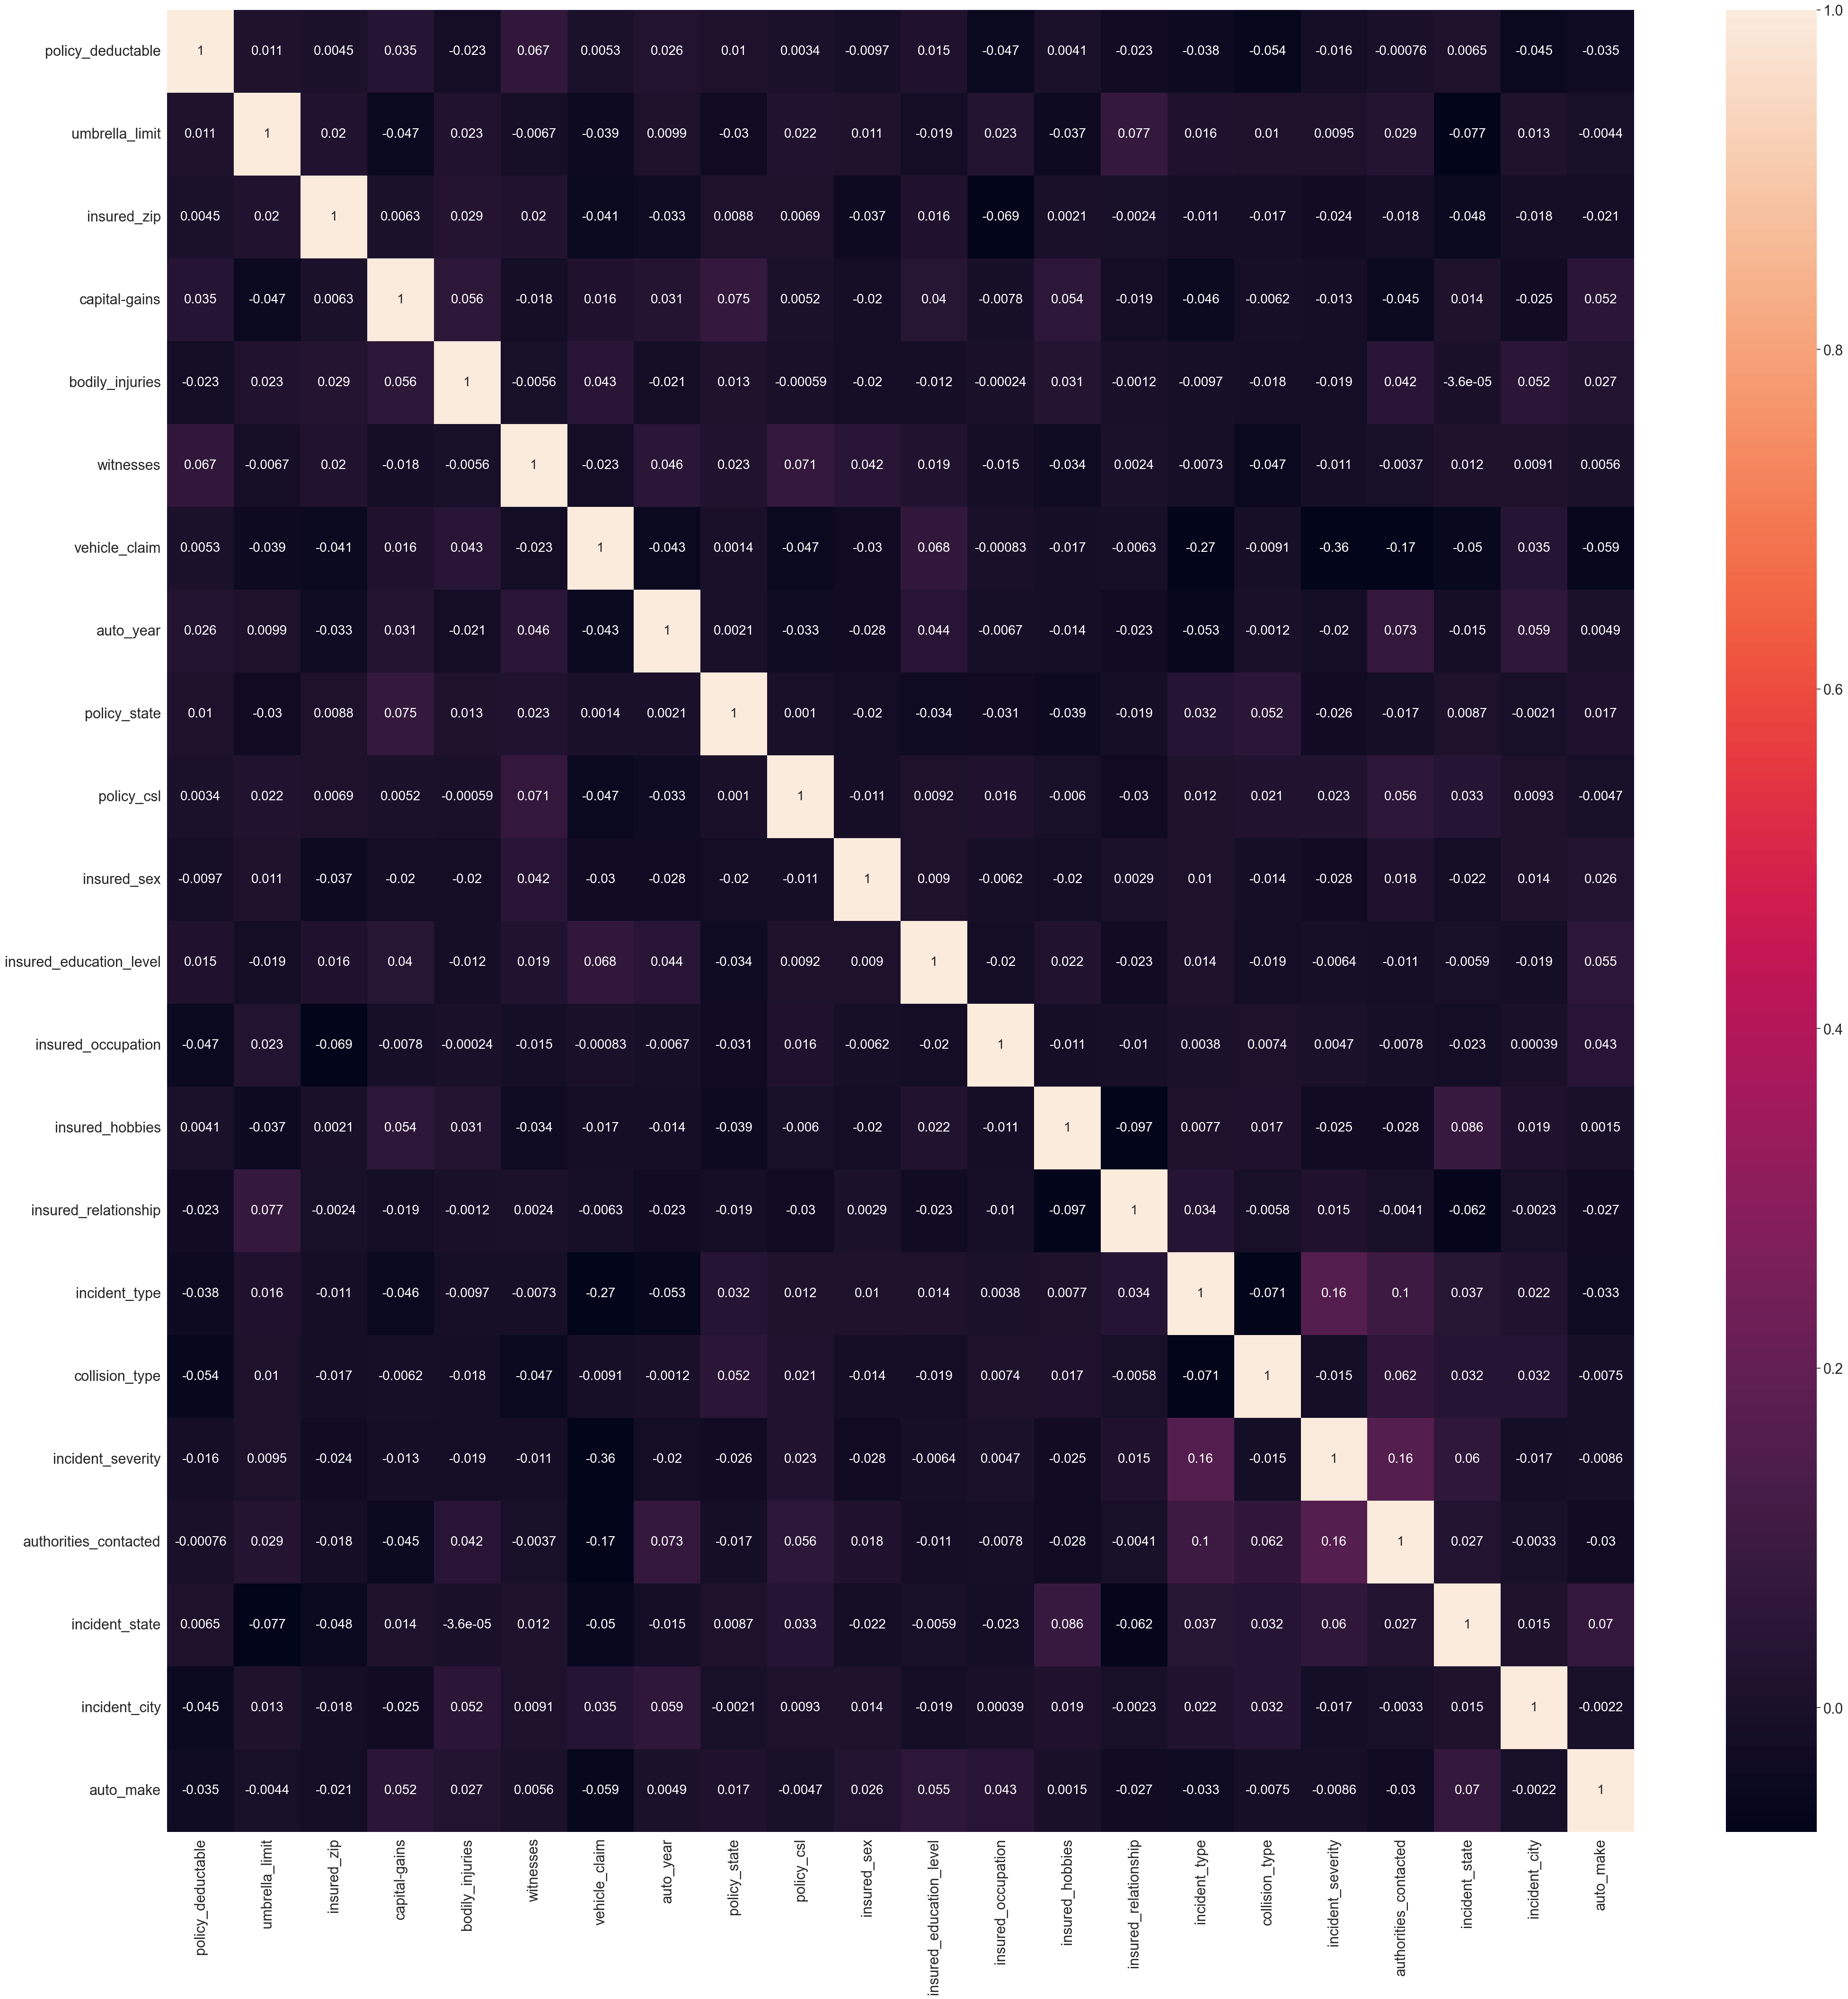

In [2381]:
plt.figure(figsize=(50,50))
sns.heatmap(X_new_vif.corr(),annot=True,fmt='.2g',annot_kws={'size':20},robust=True);

In [2382]:
# We have successfully remove multicolinearity in the dataset and now we can split the dataset into train and test.

In [2383]:
# Split Train and test 
X_train,X_test,y_train,y_test = train_test_split(X_new_vif,y,random_state=10,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 22)
(200, 22)
(800,)
(200,)


In [2384]:
logit = sm.Logit(y_train,X_train).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.438885
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         fraud_reported   No. Observations:                  800
Model:                          Logit   Df Residuals:                      778
Method:                           MLE   Df Model:                           21
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.2157
Time:                        05:07:09   Log-Likelihood:                -351.11
converged:                       True   LL-Null:                       -447.66
Covariance Type:            nonrobust   LLR p-value:                 8.212e-30
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
policy_deductable          -0.0483      0.225     -0.215      0.830      -0.489       0.392
umbrella_limit              0.7852      0.433      1.815      0.070      -0.063       1.633
insured_zip                 0.0418      0.247      0.169      0.866      -0.442       0.526
capital-gains              -0.3056      0.338     -0.903      0.366      -0.969       0.358
bodily_injuries             0.1589      0.232      0.686      0.493      -0.295       0.613
witnesses                   0.3114      0.255      1.223      0.221      -0.188       0.810
vehicle_claim               0.9096      0.419      2.171      0.030       0.089       1.731
auto_year                   0.0153      0.303      0.051      0.960      -0.578       0.609
policy_state                0.1095      0.112      0.977      0.328      -0.110       0.329
policy_csl                 -0.0526      0.116     -0.453      0.651      -0.280       0.175
insured_sex                 0.0222      0.186      0.120      0.905      -0.341       0.386
insured_education_level    -0.0068      0.047     -0.144      0.885      -0.099       0.086
insured_occupation         -0.0087      0.022     -0.386      0.699      -0.053       0.035
insured_hobbies            -0.0217      0.016     -1.360      0.174      -0.053       0.010
insured_relationship        0.0507      0.054      0.932      0.352      -0.056       0.157
incident_type              -0.0003      0.090     -0.004      0.997      -0.177       0.177
collision_type             -0.1465      0.123     -1.195      0.232      -0.387       0.094
incident_severity          -1.4310      0.134    -10.699      0.000      -1.693      -1.169
authorities_contacted       0.0617      0.061      1.005      0.315      -0.059       0.182
incident_state             -0.0582      0.044     -1.329      0.184      -0.144       0.028
incident_city              -0.0531      0.046     -1.164      0.244      -0.142       0.036
auto_make                  -0.0308      0.023     -1.318      0.187      -0.077       0.015
===========================================================================================
"""

In [2385]:
logit.aic

746.216739818185

In [2386]:
df_odds = pd.DataFrame(data=logit.params,columns=['Odds'])
df_odds

Odds
policy_deductable       -0.04829
umbrella_limit           0.78521
insured_zip              0.04176
capital-gains           -0.30555
bodily_injuries          0.15890
witnesses                0.31139
vehicle_claim            0.90961
auto_year                0.01530
policy_state             0.10948
policy_csl              -0.05261
insured_sex              0.02219
insured_education_level -0.00679
insured_occupation      -0.00869
insured_hobbies         -0.02171
insured_relationship     0.05067
incident_type           -0.00032
collision_type          -0.14647
incident_severity       -1.43096
authorities_contacted    0.06171
incident_state          -0.05817
incident_city           -0.05308
auto_make               -0.03084

In [2387]:
# Here we can see that incident_severity and vehicle_claim only significant variable

In [2388]:
y_pred_proba = logit.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_proba]
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Accuracy Score :  0.79
Recall Score :  0.40816326530612246
Precision Score : 0.6060606060606061
F1 Score :  0.48780487804878053
Cohen_kappa_score :  0.3619930123044205
Roc_auc_score :  0.6610352750371672


In [2389]:
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[138,  13],
       [ 29,  20]], dtype=int64)

In [2390]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       151
           1       0.61      0.41      0.49        49

    accuracy                           0.79       200
   macro avg       0.72      0.66      0.68       200
weighted avg       0.77      0.79      0.77       200



In [2391]:
# We can see that accuracy is 79.5%
# Recall is 38%
# Precision is 63%
# f1 score is 48%
# accuracy looks fine but other matrix is not good enough 
# let check other metrics as well

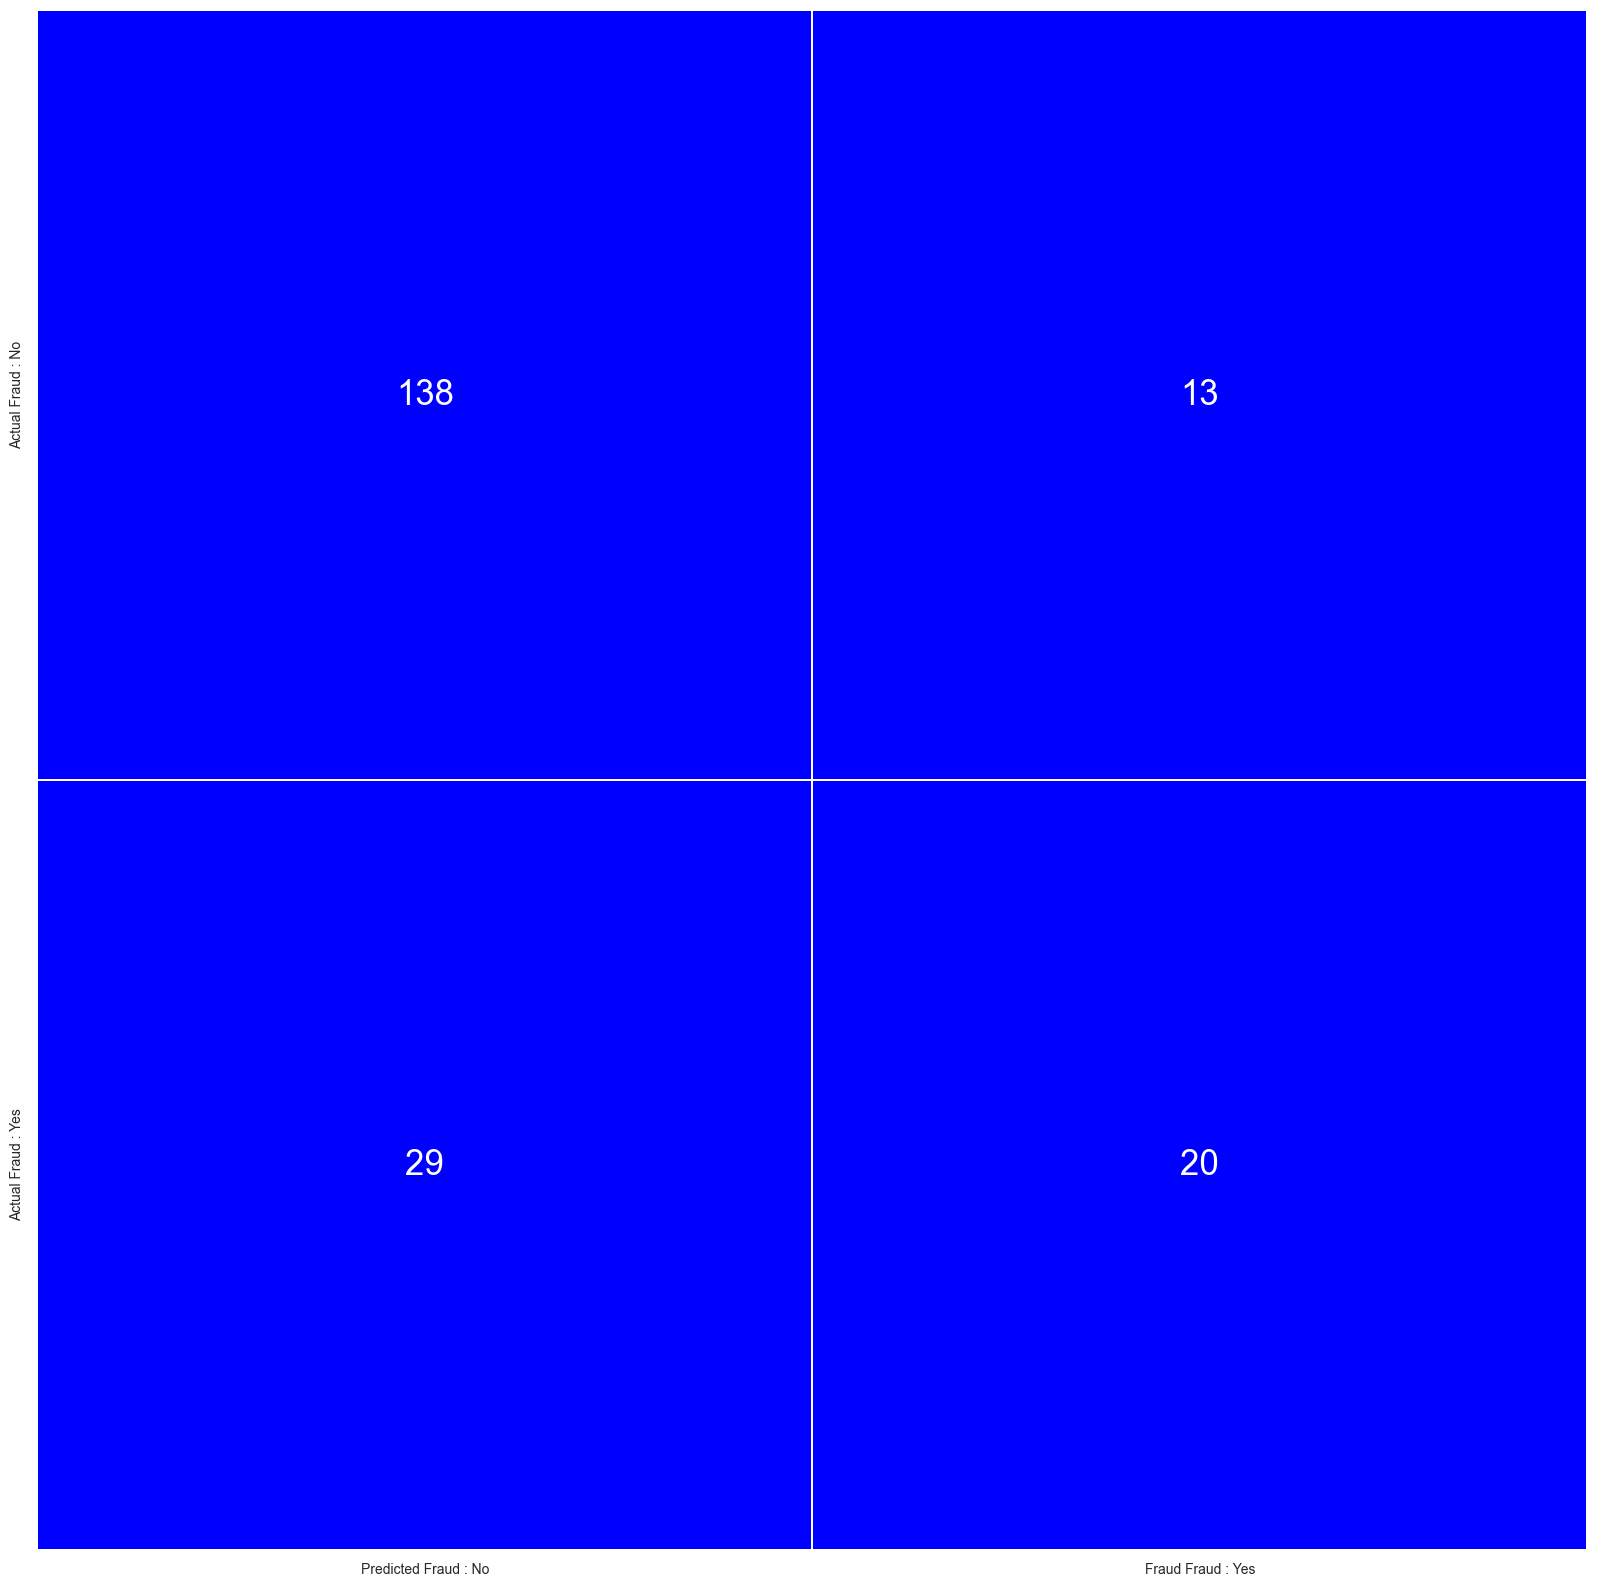

In [2392]:
cm =confusion_matrix(y_true=y_test,y_pred=y_pred)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted Fraud : No','Fraud Fraud : Yes'],
                             index=['Actual Fraud : No','Actual Fraud : Yes'])
sns.heatmap(data=conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

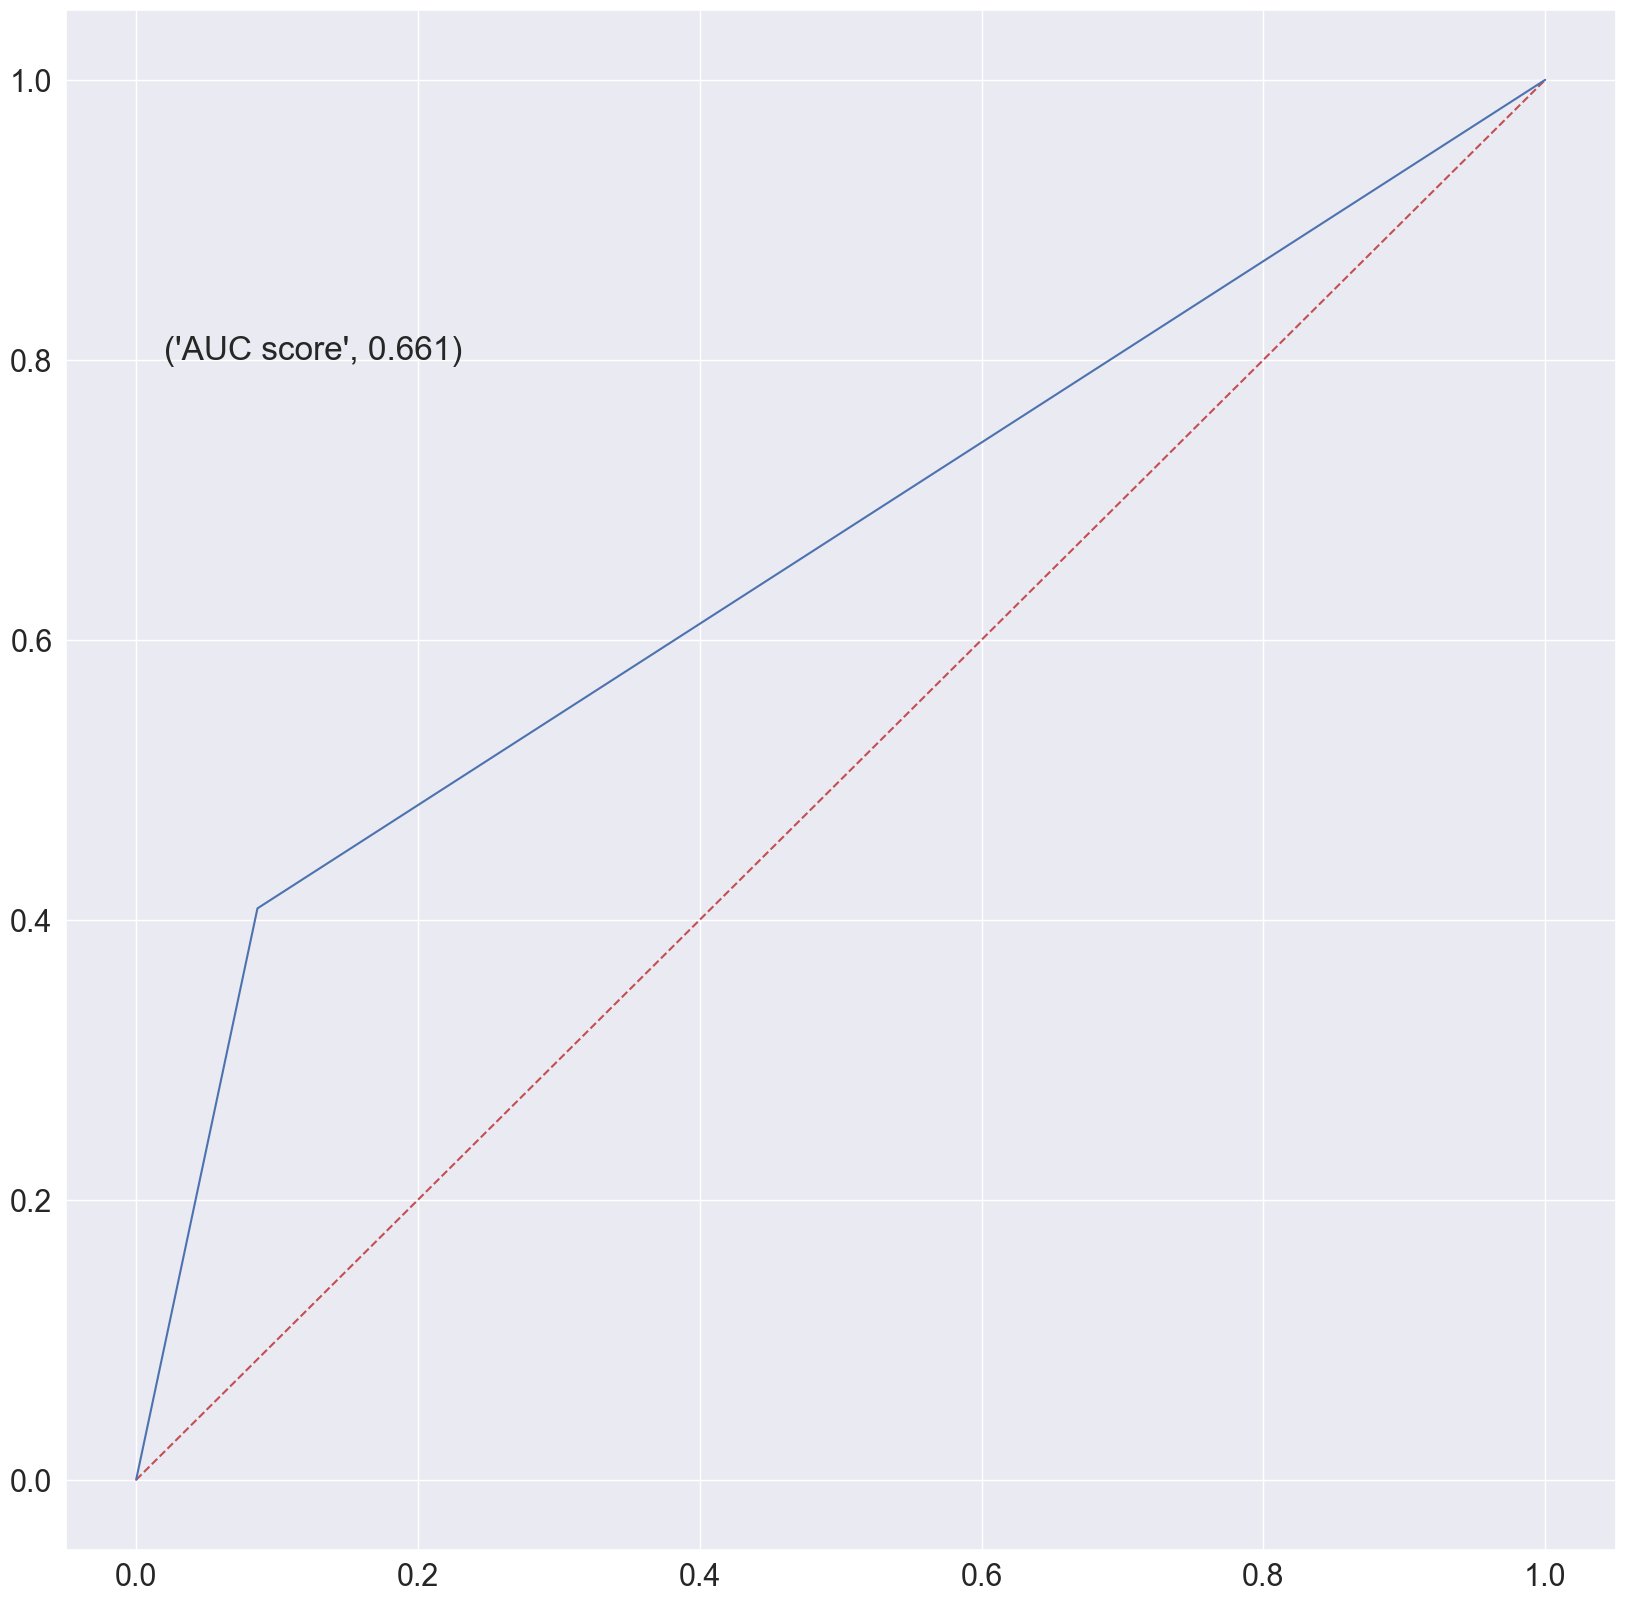

In [2393]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)

plt.text(x=0.02,y=0.8,s=('AUC score',round(roc_auc_score(y_test,y_pred),4)))

plt.grid(True)
plt.show()

In [2394]:
# We can see that cohen kappa score as 36% which is not good
# also Roc_auc_score is 66% 
# It is due to data imbalance 

In [2395]:
# let try to improve performance

# feature selection

In [2396]:
rfe = RFE(estimator=LogisticRegression(),n_features_to_select=3,importance_getter='auto')
rfe.fit(X_train,y_train)

feat_index = pd.Series(rfe.ranking_,index=X_train.columns)
signi_feat = feat_index[feat_index==1].index
signi_feat

Index(['umbrella_limit', 'vehicle_claim', 'incident_severity'], dtype='object')

In [2397]:
# Rebulidng Model with Significant feature.

In [2398]:
X_new_signi = X_new_vif[signi_feat]
X_train_signi,X_test_signi,y_train,y_test = train_test_split(X_new_signi,y,random_state=10,test_size=0.2)

print(X_train_signi.shape)
print(X_test_signi.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3)
(200, 3)
(800,)
(200,)


In [2399]:
def eval_metric(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
    print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
    print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
    print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
    print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
    print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))
    print('*************************************************************************')
    print("Confusion Matrix :\n ",confusion_matrix(y_true=y_test,y_pred=y_pred))
    print('*************************************************************************')
    print('Classification Report: \n',classification_report(y_true=y_test,y_pred=y_pred))

In [2400]:
log = LogisticRegression(random_state=10)
log.fit(X_train_signi,y_train)
y_pred = log.predict(X_test_signi)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[136,  15],
       [ 30,  19]], dtype=int64)

In [2401]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_signi,y_train)
y_pred_dt = dt.predict(X_test_signi)
confusion_matrix(y_true=y_test,y_pred=y_pred_dt)

array([[126,  25],
       [ 28,  21]], dtype=int64)

In [2402]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_signi,y_train)
y_pred_rf = rf.predict(X_test_signi)
confusion_matrix(y_true=y_test,y_pred=y_pred_rf)

array([[131,  20],
       [ 28,  21]], dtype=int64)

In [2403]:
# Random forest is perform better than other model 

### Feature selection and Cross Validation Random forest

In [2404]:
def cross_validate(model,n):
    global y_train
    rfe_rf = RFE(estimator=model,n_features_to_select=n,importance_getter='auto')
    rfe_rf.fit(X_train,y_train)

    feat_index_rf = pd.Series(rfe_rf.ranking_,index=X_train.columns)
    signi_feat_rf = feat_index_rf[feat_index_rf==1].index
    X_train_rf = X_train[signi_feat_rf]
    model.fit(X_train_rf,y_train)
    kf =KFold(n_splits=5)
    model.fit(X_train_rf,y_train)
    scores_val_score = cross_val_score(estimator=model,
                                   X=X_train_rf,y=y_train,scoring='roc_auc')
    return scores_val_score,signi_feat_rf

In [2405]:
cross_validate(RandomForestClassifier(),3)

(array([0.8453125 , 0.8684375 , 0.8790625 , 0.91513032, 0.89542276]),
 Index(['insured_zip', 'insured_hobbies', 'incident_severity'], dtype='object'))

In [2406]:
cross_validate(RandomForestClassifier(),4)

(array([0.85083333, 0.86791667, 0.87260417, 0.88673448, 0.89224412]),
 Index(['insured_zip', 'vehicle_claim', 'insured_hobbies', 'incident_severity'], dtype='object'))

In [2407]:
X_new_signi = X_new_vif[cross_validate(rf,4)[1]]
X_train_signi_rf,X_test_signi_rf,y_train,y_test = train_test_split(X_new_signi,y,random_state=10,test_size=0.2)

print(X_train_signi_rf.shape)
print(X_test_signi_rf.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [2408]:
kf =KFold(n_splits=5)
val_predict = cross_val_predict(estimator=RandomForestClassifier(random_state=10),
                                   X=X_test_signi_rf,y=y_test)
val_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [2409]:
confusion_matrix(y_true=y_test,y_pred=val_predict)

array([[134,  17],
       [ 28,  21]], dtype=int64)

In [2410]:
# HyperParameter tuning

In [2411]:
param_list = [{'n_estimators':[10,25,50,100,150,200],
              'criterion':['gini','entropy'],
              'max_depth':[None,10,20,50]}]

rf2 =  RandomForestClassifier(random_state=10)
kf = KFold(n_splits=5)
grid = GridSearchCV(estimator=rf2,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2)
grid.fit(X_train_signi_rf,y_train)
print('Best Param for Random Forest ',grid.best_params_)
print('Best Score for Random Forest ',grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_

[CV] END ......criterion=gini, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END ......criterion=gini, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END ......criterion=gini, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.0s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.0s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.0s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.0s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.0s
[CV] END .....criterion=gini, max_depth=50, n_estimators=150; total time=   0.1s
[CV] END .....criterion=gini, max_depth=50, n_estimators=150; total time=   0.1s
[CV] END .....criterion=gini, max_depth=50, n_estimators=150; total time=   0.1s
[CV] END .....criterion=gini, max_depth=50, n_estimators=150; total time=   0.1s
[CV] END .....criterion=gini

[CV] END ..criterion=entropy, max_depth=20, n_estimators=150; total time=   0.1s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.2s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.2s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.2s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.2s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.2s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=25; total time=   0.0s
[CV] END ...criterion=entrop

In [2412]:
rf_tuned = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],criterion=grid.best_params_['criterion'],
                                  max_depth=grid.best_params_['max_depth'],random_state=10)
rf_tuned.fit(X_train_signi_rf,y_train)
eval_metric(rf_tuned,X_test_signi_rf,y_test)

Accuracy Score :  0.81
Recall Score :  0.5918367346938775
Precision Score : 0.6170212765957447
F1 Score :  0.6041666666666666
Cohen_kappa_score :  0.47923804303138273
Roc_auc_score :  0.7363157183403163
*************************************************************************
Confusion Matrix :
  [[133  18]
 [ 20  29]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       151
           1       0.62      0.59      0.60        49

    accuracy                           0.81       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.81      0.81      0.81       200



# Boosting Technique

In [2413]:
ada_boast = AdaBoostClassifier(random_state=10)
ada_boast.fit(X_train,y_train)
y_pred = ada_boast.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[135,  16],
       [ 25,  24]], dtype=int64)

In [2414]:
gb_boast = GradientBoostingClassifier(random_state=10)
gb_boast.fit(X_train,y_train)
y_pred = gb_boast.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[136,  15],
       [ 13,  36]], dtype=int64)

In [2415]:
xgb_boast = XGBClassifier(random_state=10)
xgb_boast.fit(X_train,y_train)
y_pred = xgb_boast.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[134,  17],
       [ 20,  29]], dtype=int64)

# Stacking 

In [2416]:
base_learners = [('Random Forest',RandomForestClassifier(random_state=10)),
                ('Decision Tree',DecisionTreeClassifier(random_state=10))]
stack_gb = StackingClassifier(estimators=base_learners,final_estimator=XGBClassifier(random_state=10))
stack_gb.fit(X_train,y_train)
y_pred = stack_gb.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[133,  18],
       [ 16,  33]], dtype=int64)

In [2417]:
# We can see that Gradient Boasting is performing better than other model on True Postive Cases

In [2418]:
cross_validate(GradientBoostingClassifier(random_state=10),10)

(array([0.8675    , 0.88541667, 0.89      , 0.91015046, 0.87137105]),
 Index(['umbrella_limit', 'insured_zip', 'capital-gains', 'vehicle_claim',
        'auto_year', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'incident_severity', 'auto_make'],
       dtype='object'))

In [2419]:
cross_validate(GradientBoostingClassifier(random_state=10),4)

(array([0.84958333, 0.86458333, 0.87479167, 0.90909091, 0.89107862]),
 Index(['insured_zip', 'vehicle_claim', 'insured_hobbies', 'incident_severity'], dtype='object'))

In [2420]:
X_new_signi = X_new_vif[cross_validate(GradientBoostingClassifier(random_state=10),4)[1]]
X_train_signi_gb,X_test_signi_gb,y_train,y_test = train_test_split(X_new_signi,y,random_state=10,test_size=0.2)

print(X_train_signi_gb.shape)
print(X_test_signi_gb.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [2421]:
param_list = [{'n_estimators':[10,25,50,75],
              'learning_rate':[0.1,0.01,0.05,0.15],
              'max_depth':[3,10,15,20,25]}]

gb2 =  GradientBoostingClassifier(random_state=10)
kf = KFold(n_splits=5)
grid2 = GridSearchCV(estimator=gb2,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2,n_jobs=2)
grid2.fit(X_train_signi_gb,y_train)
print('Best Param for Gradient Boasting ',grid2.best_params_)
print('Best Score for Gradient Boasting ',grid2.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Param for Gradient Boasting  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 25}
Best Score for Gradient Boasting  0.8923720025835328


In [2422]:
gb_boost_tuned = GradientBoostingClassifier(n_estimators=grid2.best_params_['n_estimators'],learning_rate=grid2.best_params_['learning_rate'],
                                  max_depth=grid2.best_params_['max_depth'],random_state=10)
gb_boost_tuned.fit(X_train_signi_gb,y_train)
eval_metric(gb_boost_tuned,X_test_signi_gb,y_test)

Accuracy Score :  0.845
Recall Score :  0.7755102040816326
Precision Score : 0.6551724137931034
F1 Score :  0.7102803738317757
Cohen_kappa_score :  0.6054975820819547
Roc_auc_score :  0.8215299364779024
*************************************************************************
Confusion Matrix :
  [[131  20]
 [ 11  38]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       151
           1       0.66      0.78      0.71        49

    accuracy                           0.84       200
   macro avg       0.79      0.82      0.80       200
weighted avg       0.86      0.84      0.85       200



In [2423]:
def draw_confusion_matrix(model,X_test,y_train):
    y_pred_tuned = model.predict(X_test)
    cm =confusion_matrix(y_true=y_test,y_pred=y_pred_tuned)

    conf_matrix = pd.DataFrame(data=cm,columns=['Predicted Fraud : No','Predicted Fraud : Yes'],
                             index=['Actual Fraud : No','Actual Fraud : Yes'])
    sns.heatmap(data=conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

In [2424]:
def draw_roc_auc_curve(model,X_test,y_test):
    y_pred = model.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)

    plt.plot([0,1],[0,1],'r--')
    plt.plot(fpr,tpr)

    plt.text(x=0.02,y=0.8,s=('AUC score',round(roc_auc_score(y_test,y_pred),5)))

    plt.grid(True)
    plt.show()

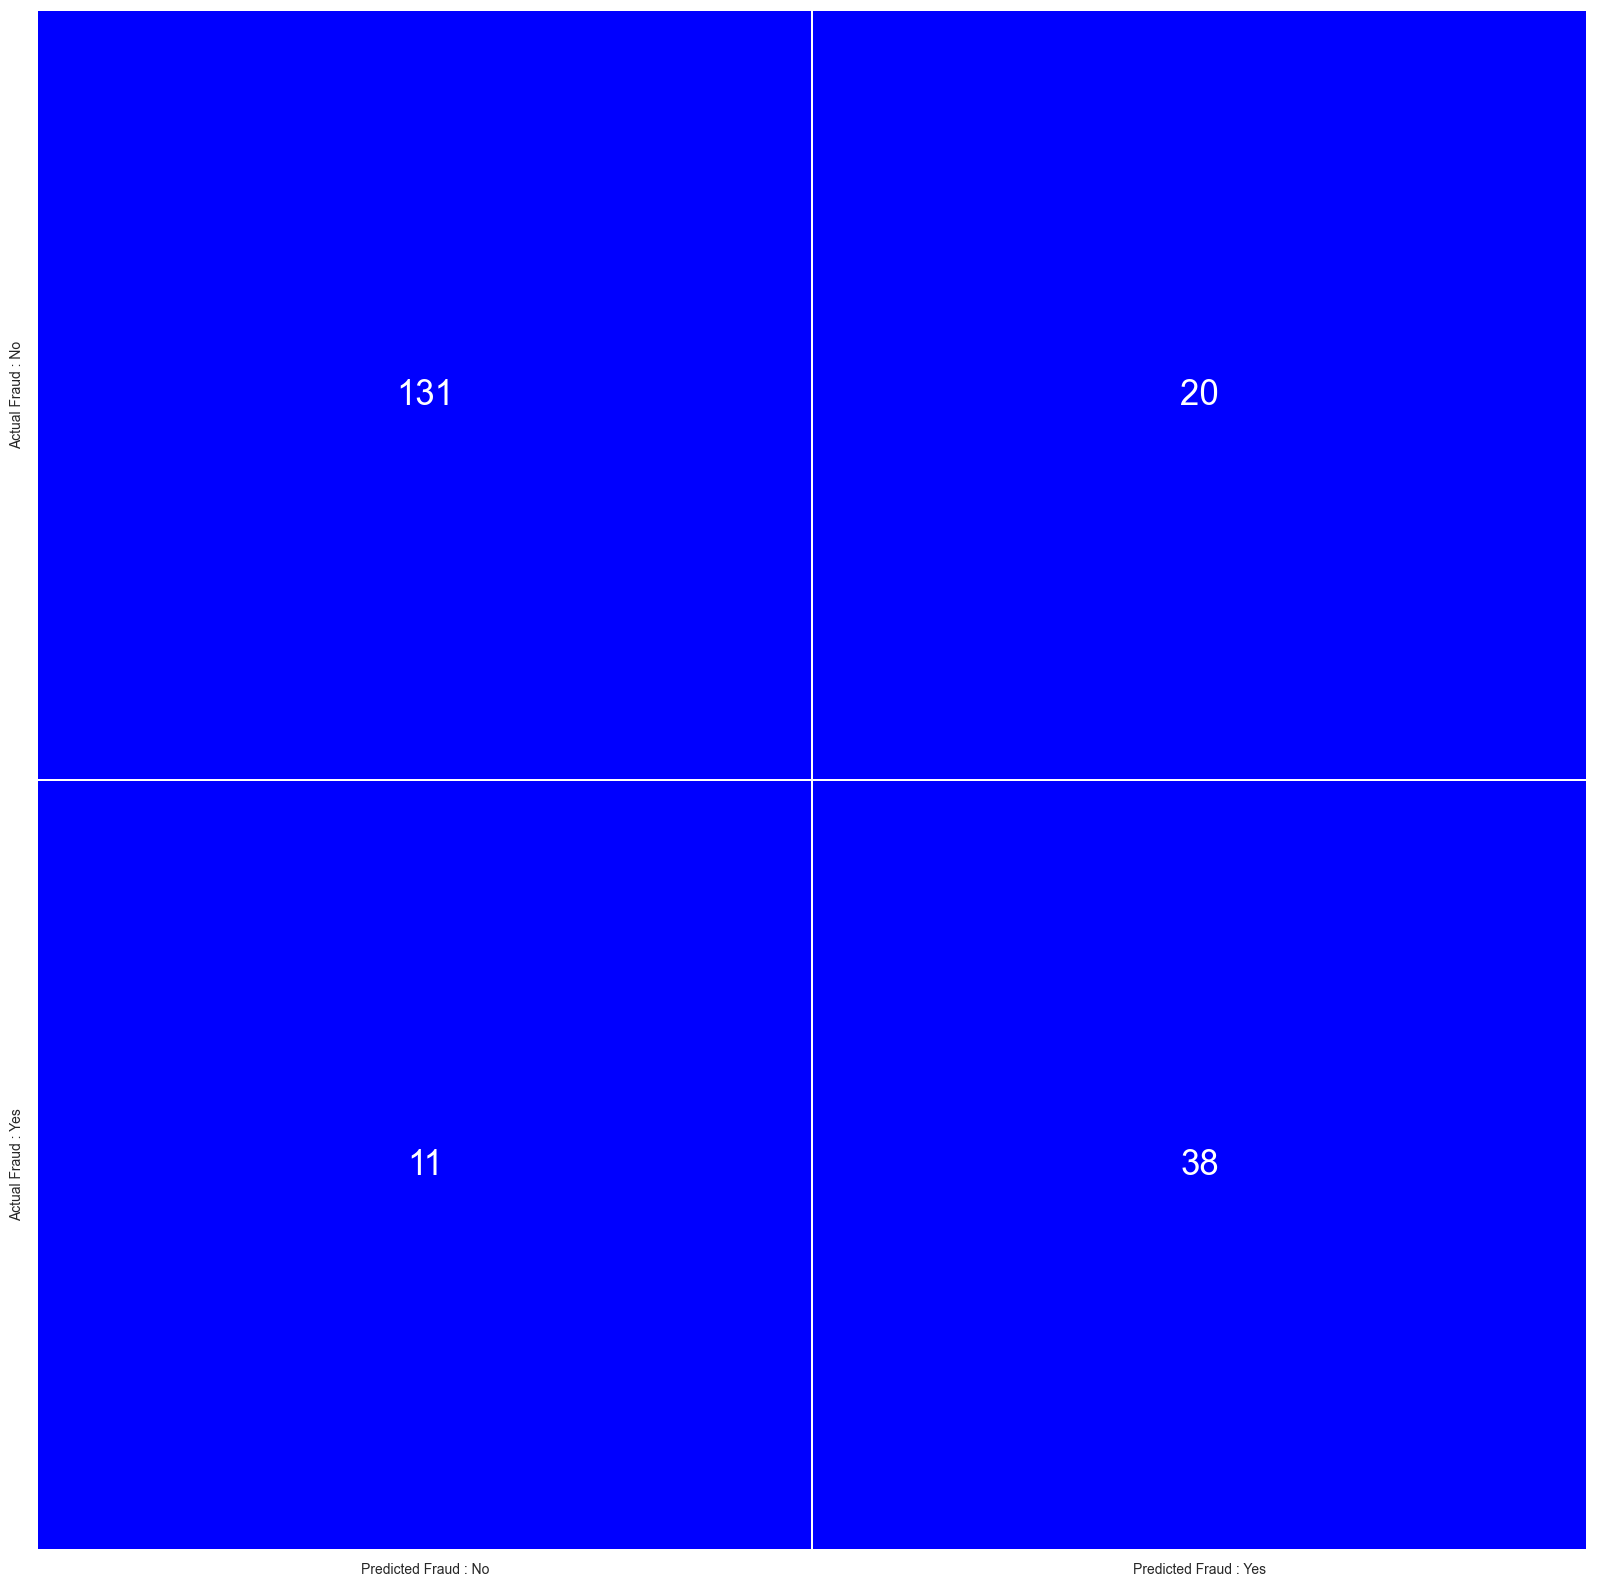

In [2425]:
draw_confusion_matrix(gb_boost_tuned,X_test_signi_gb,y_test)

In [2426]:
# Here we have improve the overall model by using hyperparameter tuning

In [2427]:
cross_validate(XGBClassifier(random_state=10),10)

(array([0.88520833, 0.86291667, 0.88375   , 0.91629583, 0.90336936]),
 Index(['policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains',
        'witnesses', 'insured_hobbies', 'insured_relationship',
        'collision_type', 'incident_severity', 'authorities_contacted'],
       dtype='object'))

In [2428]:
X_new_signi = X_new_vif[cross_validate(XGBClassifier(random_state=10),10)[1]]
X_train_signi_xgb,X_test_signi_xgb,y_train,y_test = train_test_split(X_new_signi,y,random_state=10,test_size=0.2)

print(X_train_signi_xgb.shape)
print(X_test_signi_xgb.shape)
print(y_train.shape)
print(y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


In [2429]:
param_list = [{'n_estimators':[10,25,50,75,100,200],
              'learning_rate':[0.1,0.01,0.05,0.15],
              'max_depth':[3,10,15,20,25]}]

xgb2 =  XGBClassifier(random_state=10)
kf = KFold(n_splits=5)
grid2 = GridSearchCV(estimator=xgb2,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2,n_jobs=2)
grid2.fit(X_train_signi_xgb,y_train)
print('Best Param for Xtreme Gradient Boasting ',grid2.best_params_)
print('Best Score for Xtreme Gradient Boasting ',grid2.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Param for Xtreme Gradient Boasting  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best Score for Xtreme Gradient Boasting  0.907212753551381


In [2432]:
xgb_boost_tuned = XGBClassifier(n_estimators=grid2.best_params_['n_estimators'],learning_rate=grid2.best_params_['learning_rate'],
                                  max_depth=grid2.best_params_['max_depth'],random_state=10)
xgb_boost_tuned.fit(X_train_signi_xgb,y_train)
eval_metric(xgb_boost_tuned,X_test_signi_xgb,y_test)

Accuracy Score :  0.84
Recall Score :  0.673469387755102
Precision Score : 0.673469387755102
F1 Score :  0.673469387755102
Cohen_kappa_score :  0.5675091228544398
Roc_auc_score :  0.78375456142722
*************************************************************************
Confusion Matrix :
  [[135  16]
 [ 16  33]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       151
           1       0.67      0.67      0.67        49

    accuracy                           0.84       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.84      0.84      0.84       200



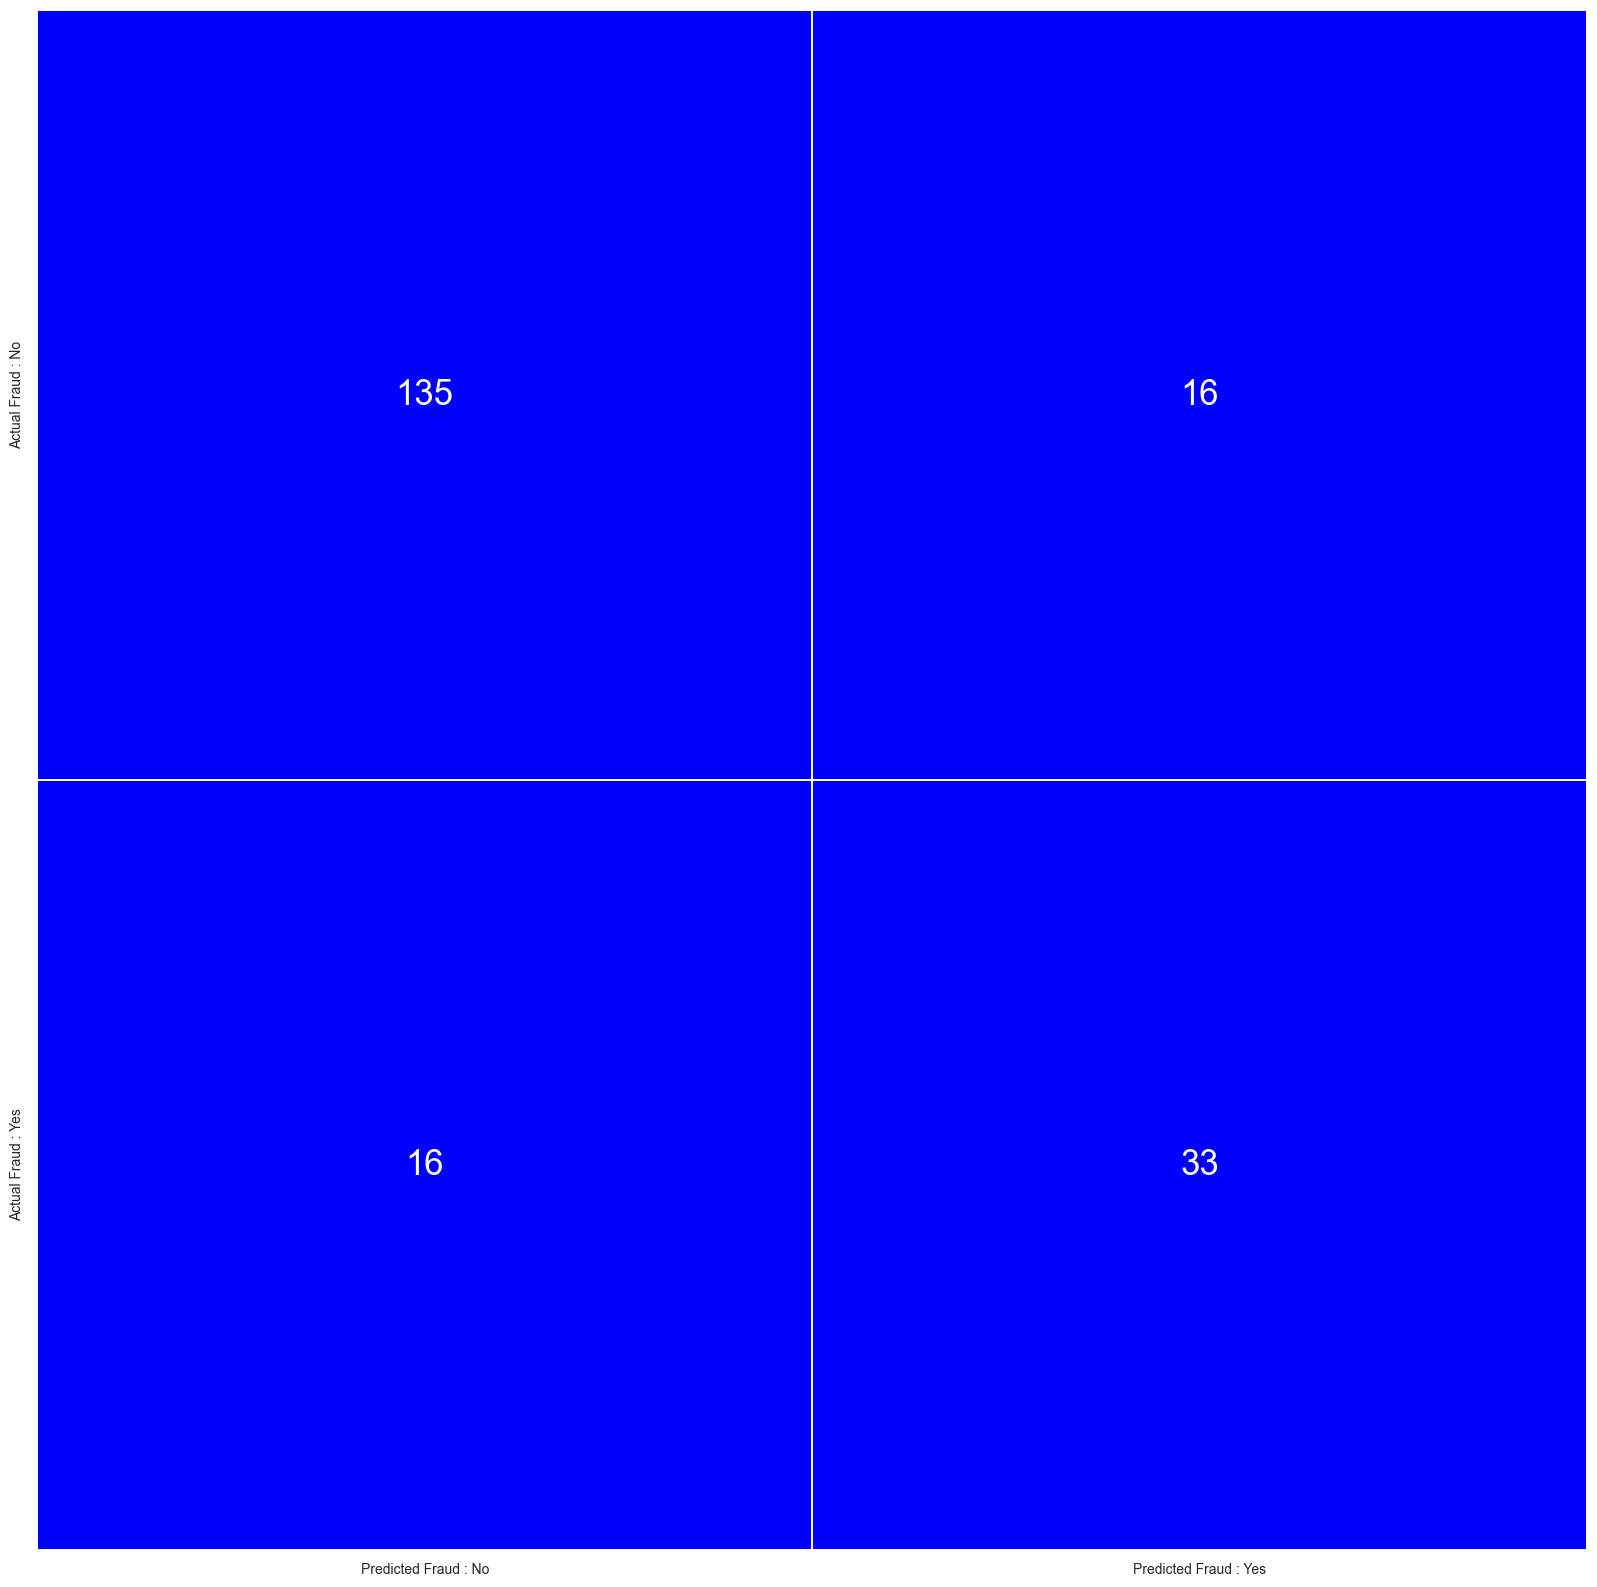

In [2433]:
draw_confusion_matrix(xgb_boost_tuned,X_test_signi_xgb,y_test)

In [2434]:
# We have significantly improve the performance by using Hyperparameter Tuning
# Let try to handle data imbalance

# Handling Data Imbalance

In [2435]:
smote = SMOTE(sampling_strategy='auto' ,random_state=10)
oversample_X,oversample_y = smote.fit_resample(X_new_vif,y)
oversampled = pd.concat([oversample_X,oversample_y],axis=1)
oversampled.head()

policy_deductable  umbrella_limit  insured_zip  capital-gains  \
0            0.33333         0.09091      0.18877        0.53035   
1            1.00000         0.54545      0.19948        0.00000   
2            1.00000         0.54545      0.00277        0.34925   
3            1.00000         0.63636      0.93270        0.48657   
4            0.33333         0.63636      0.94626        0.65672   

   bodily_injuries  witnesses  vehicle_claim  auto_year  policy_state  \
0              0.5    0.66667        0.65430       0.45             2   
1              0.0    0.00000        0.04328       0.60             1   
2              1.0    1.00000        0.28972       0.60             2   
3              0.5    0.66667        0.63719       0.95             0   
4              0.0    0.33333        0.05636       0.70             0   

   policy_csl  insured_sex  insured_education_level  insured_occupation  \
0           1            1                        4                   2   
1           1            1                        4                   6   
2           0            0                        6                  11   
3           1            0                        6                   1   
4           2            1                        0                  11   

   insured_hobbies  insured_relationship  incident_type  collision_type  \
0               17                     0              2               2   
1               15                     2              3               1   
2                2                     3              0               1   
3                2                     4              2               0   
4                2                     4              3               1   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   
2                  1                      4               1              1   
3                  0                      4               2              0   
4                  1                      2               1              0   

   auto_make  fraud_reported  
0         10               1  
1          8               1  
2          4               0  
3          3               1  
4          0               0

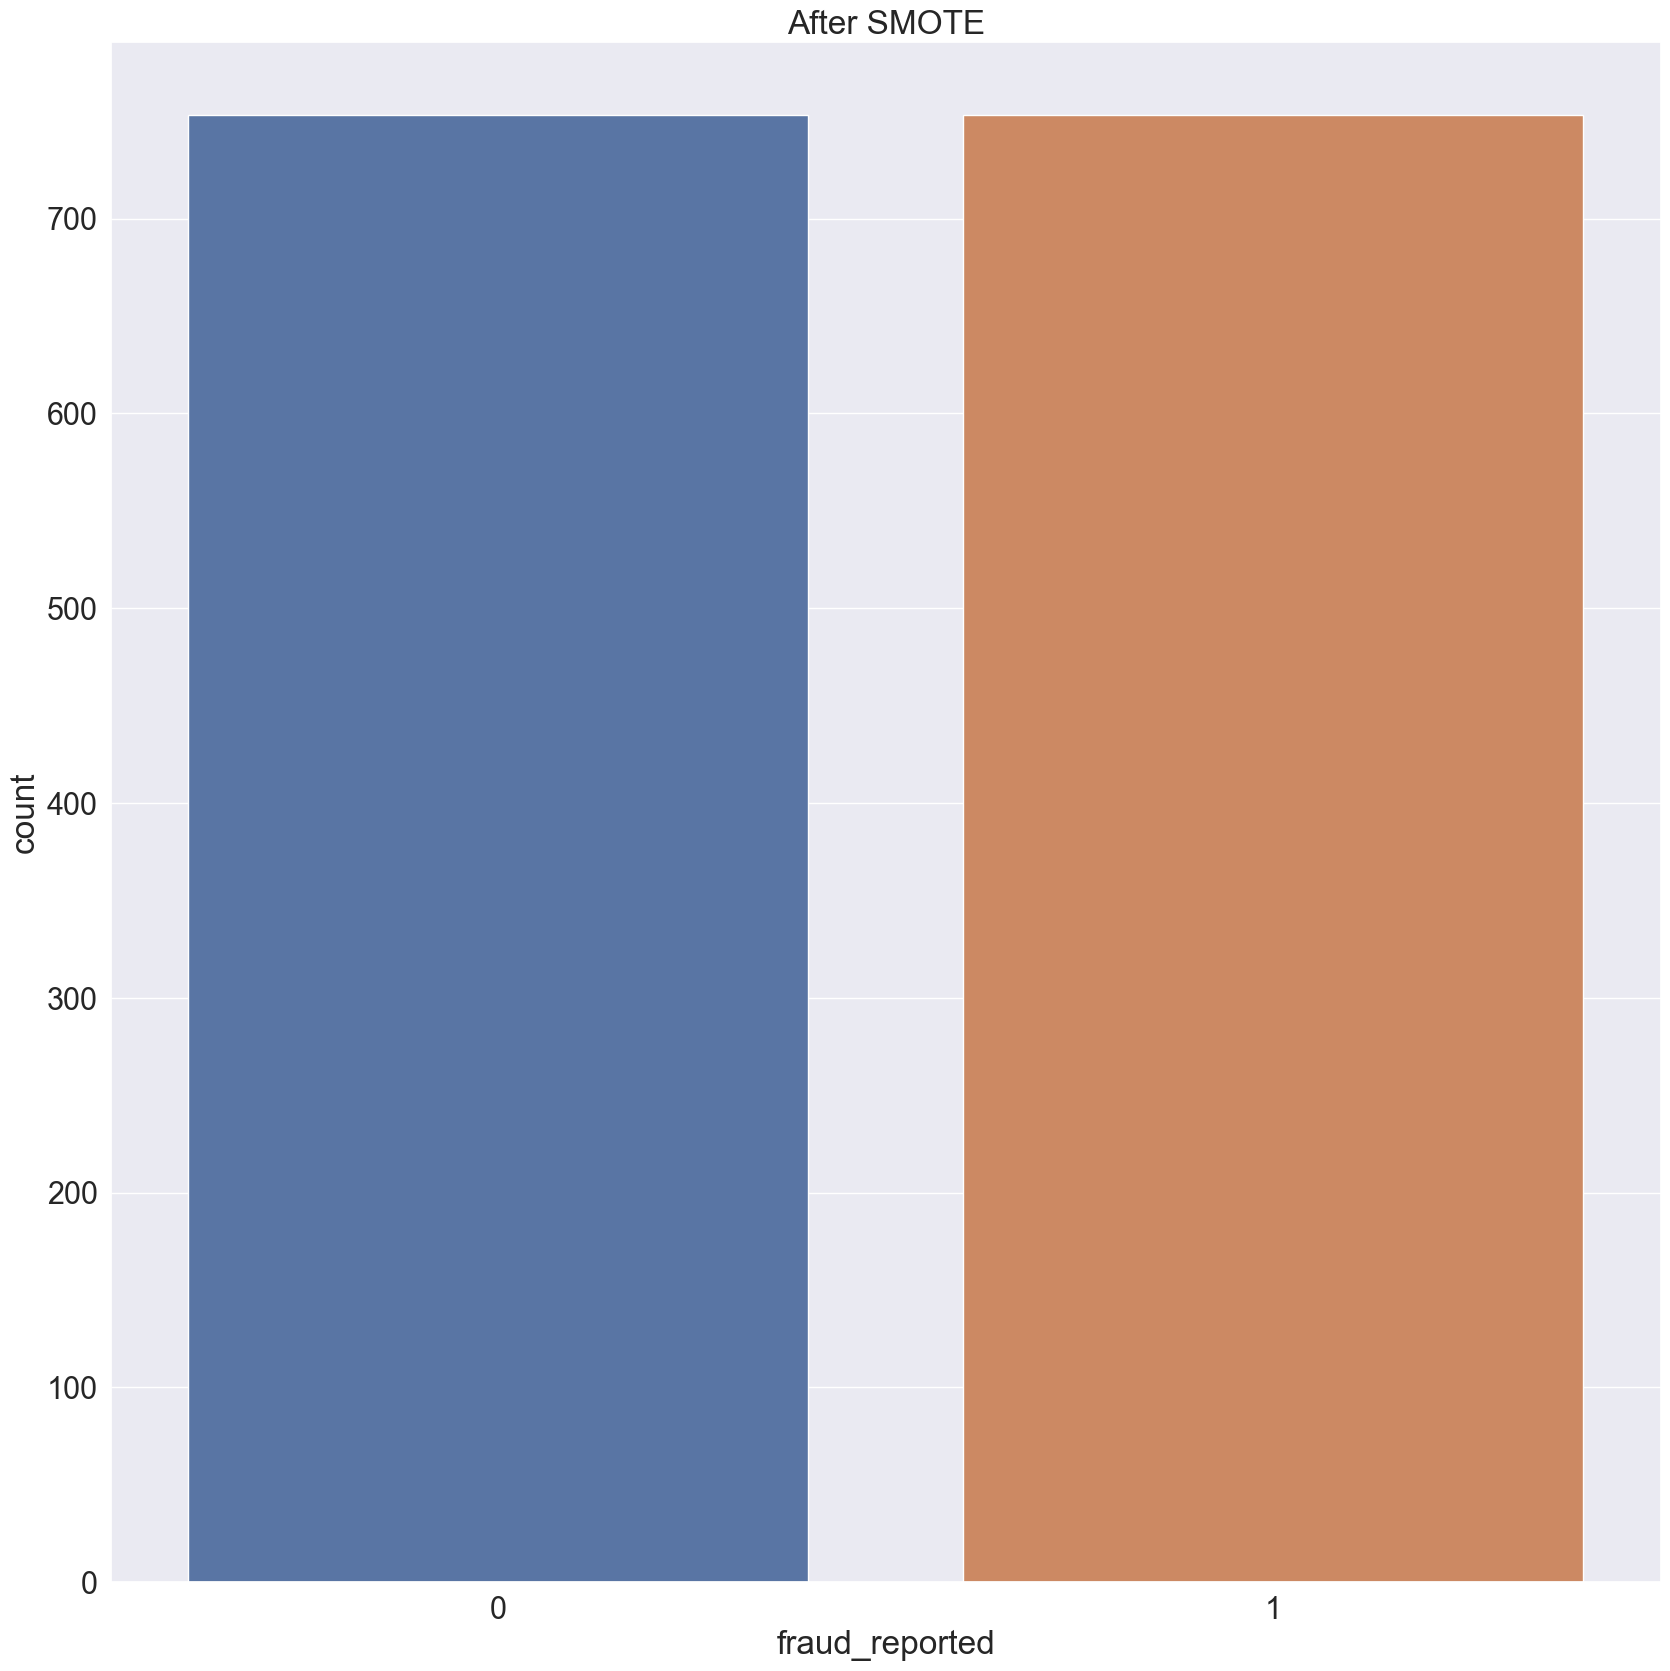

In [2436]:
sns.countplot(x=oversampled['fraud_reported'])
plt.title('After SMOTE');

In [2437]:
X_train_signi_gb,X_test_signi_gb,y_train,y_test = train_test_split(oversample_X,oversample_y,random_state=10,test_size=0.2)

print(X_train_signi_gb.shape)
print(X_test_signi_gb.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 22)
(302, 22)
(1204,)
(302,)


In [2438]:
gb_boost2 = GradientBoostingClassifier(random_state=10)
gb_boost2.fit(X_train_signi_gb,y_train)
y_pred = gb_boost2.predict(X_test_signi_gb)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[122,  22],
       [ 15, 143]], dtype=int64)

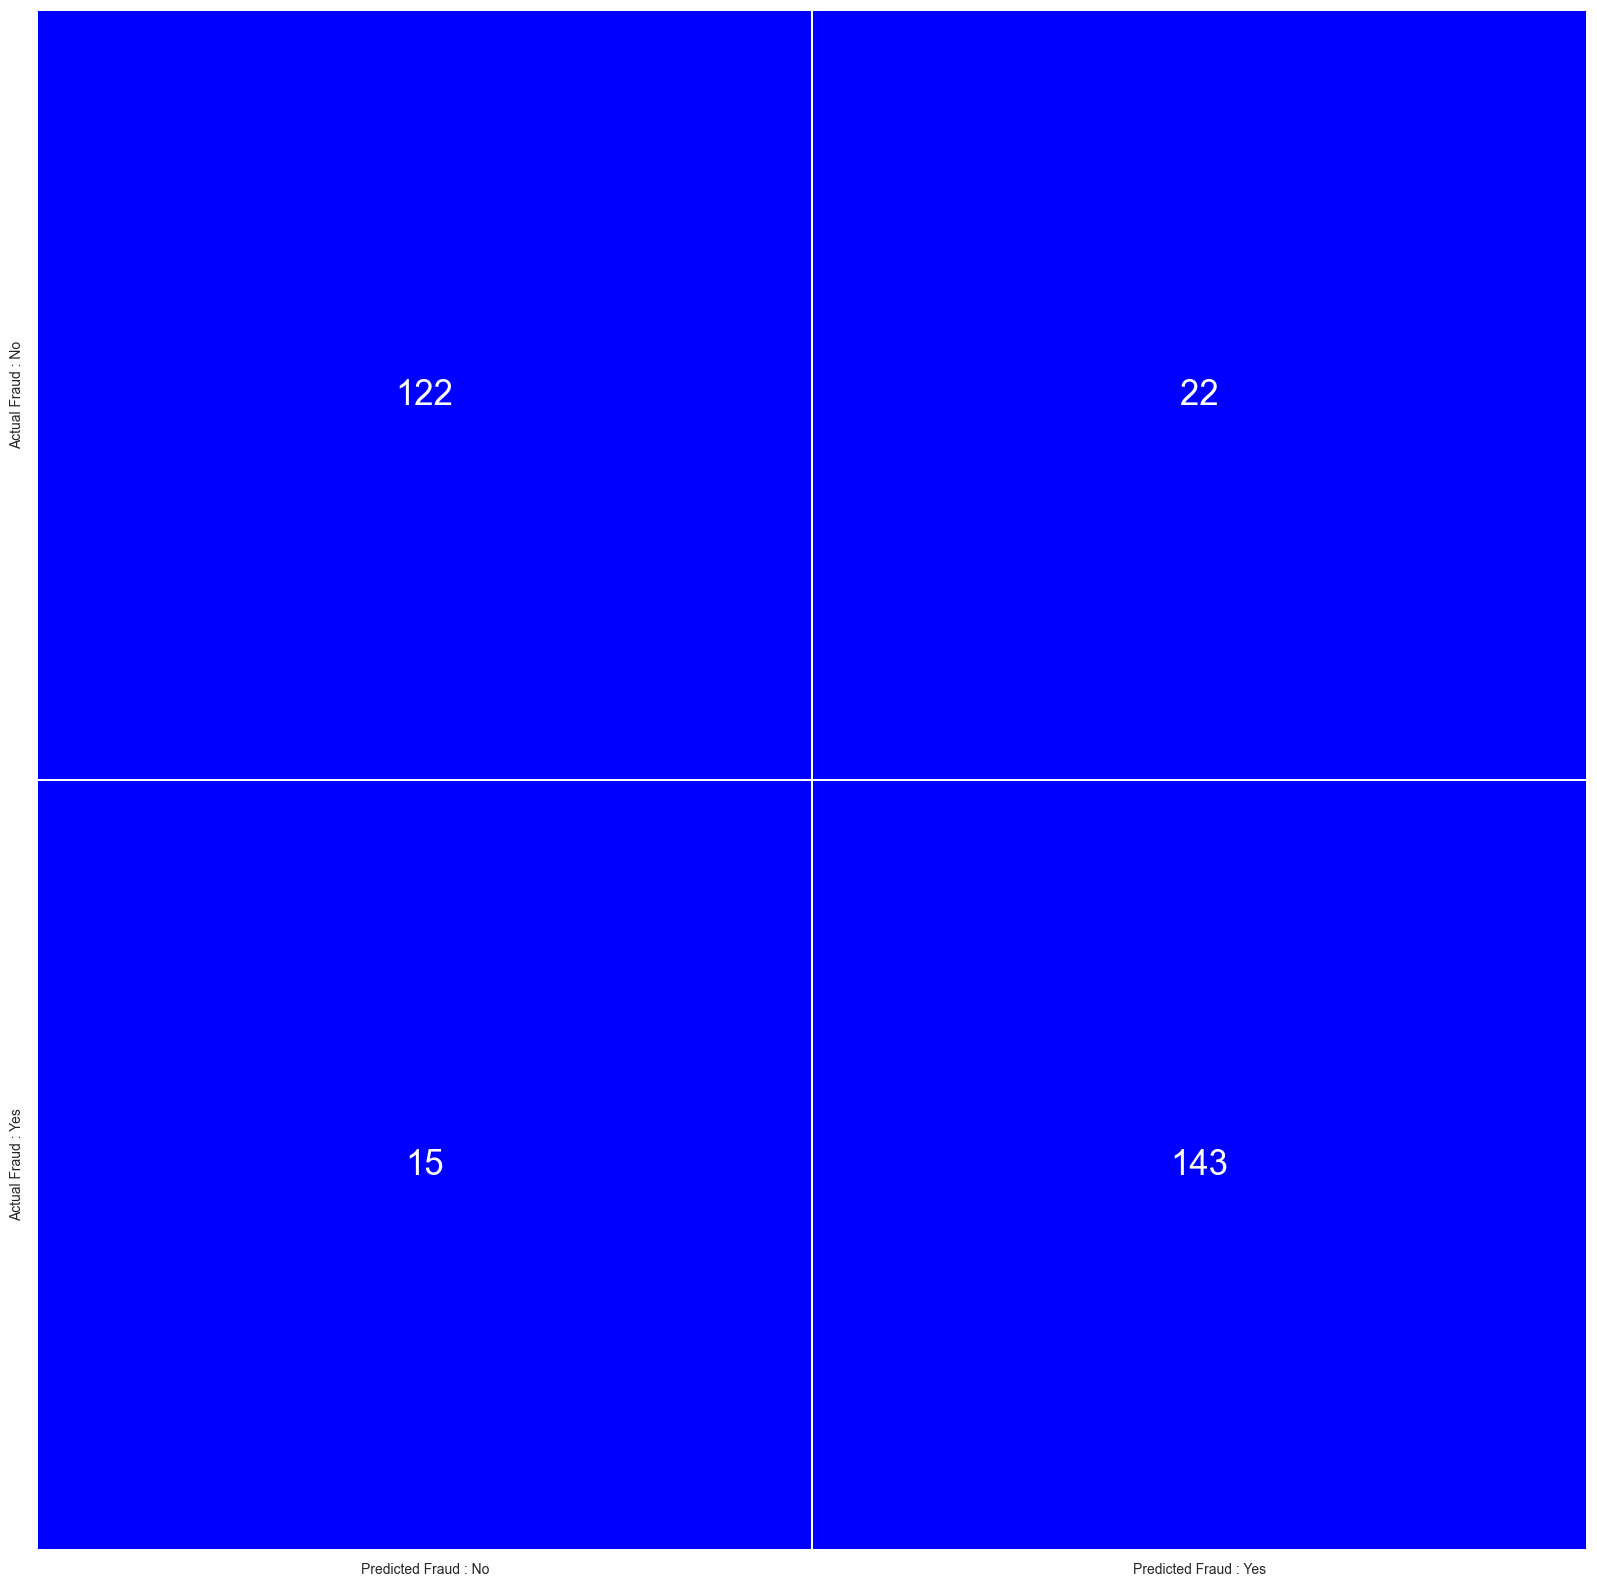

In [2439]:
draw_confusion_matrix(gb_boost2,X_test_signi_gb,y_test)

In [2440]:
rfe_gb = RFE(estimator=GradientBoostingClassifier(random_state=10),n_features_to_select=6,importance_getter='auto')
rfe_gb.fit(X_train_signi_gb,y_train)

feat_index_gb = pd.Series(rfe_gb.ranking_,index=X_train_signi_gb.columns)

signi_feat_gb = feat_index_gb[feat_index_gb==1].index
signi_feat_gb

Index(['insured_zip', 'bodily_injuries', 'witnesses', 'auto_year',
       'insured_hobbies', 'incident_severity'],
      dtype='object')

In [2441]:
X_new_signi2 = oversample_X[signi_feat_gb]

X_train_signi_gb2,X_test_signi_gb2,y_train,y_test = train_test_split(X_new_signi2,oversample_y,random_state=10,test_size=0.2)

print(X_train_signi_gb2.shape)
print(X_test_signi_gb2.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 6)
(302, 6)
(1204,)
(302,)


In [2442]:
kf =KFold(n_splits=5)
scores_val_score = cross_val_score(estimator=GradientBoostingClassifier(random_state=10),
                                   X=X_train_signi_gb2,y=y_train,scoring='roc_auc')
print(scores_val_score)
print(np.average(scores_val_score))
print(np.std(scores_val_score))

[0.95557239 0.95261055 0.93504615 0.94496487 0.97291479]
0.952221750372009
0.012547854338196881


In [2443]:
param_list = [{'n_estimators':[10,50,100,200,250],
              'learning_rate':[0.1,0.01,0.05,0.2],
              'max_depth':[3,10,15],
              'max_features':[3,4,5,6]}]

gb2 =  GradientBoostingClassifier(random_state=10)
kf = KFold(n_splits=5)
grid2 = GridSearchCV(estimator=gb2,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2,n_jobs=2)
grid2.fit(X_train_signi_gb2,y_train)
print('Best Param for  Gradient Boasting ',grid2.best_params_)
print('Best Score for  Gradient Boasting ',grid2.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Param for  Gradient Boasting  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 5, 'n_estimators': 200}
Best Score for  Gradient Boasting  0.9540380527148183


In [2445]:
gb_boost_tuned2 = GradientBoostingClassifier(n_estimators=grid2.best_params_['n_estimators'],learning_rate=grid2.best_params_['learning_rate'],
                                  max_depth=grid2.best_params_['max_depth'],max_features=grid2.best_params_['max_features'],random_state=10)
gb_boost_tuned2.fit(X_train_signi_gb2,y_train)
eval_metric(gb_boost_tuned2,X_test_signi_gb2,y_test)

Accuracy Score :  0.9072847682119205
Recall Score :  0.9177215189873418
Precision Score : 0.90625
F1 Score :  0.9119496855345911
Cohen_kappa_score :  0.8140557656785997
Roc_auc_score :  0.9067774261603376
*************************************************************************
Confusion Matrix :
  [[129  15]
 [ 13 145]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       144
           1       0.91      0.92      0.91       158

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



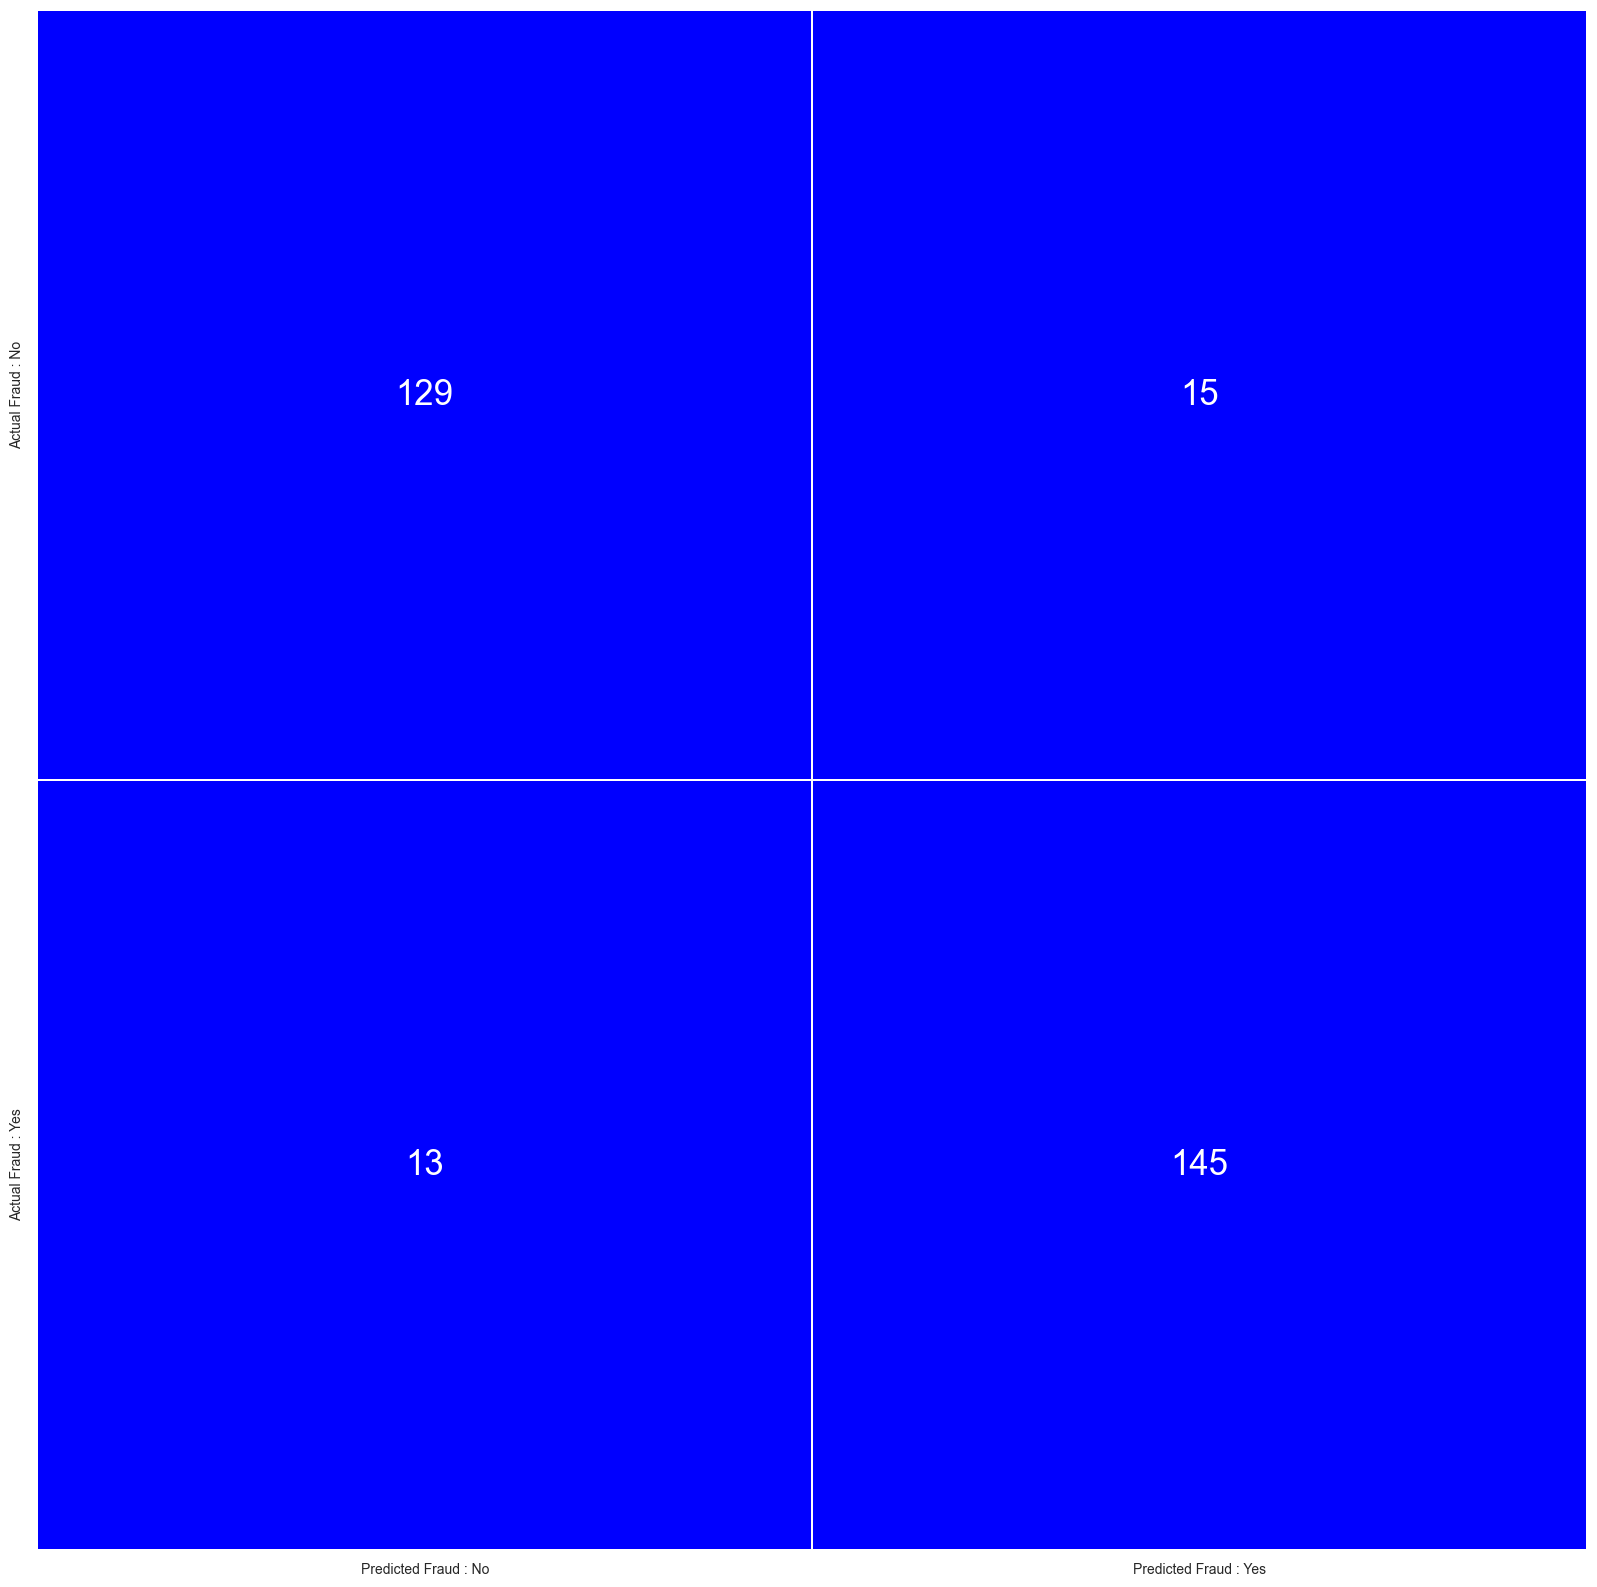

In [2446]:
# type your code here
draw_confusion_matrix(gb_boost_tuned2,X_test_signi_gb2,y_test)

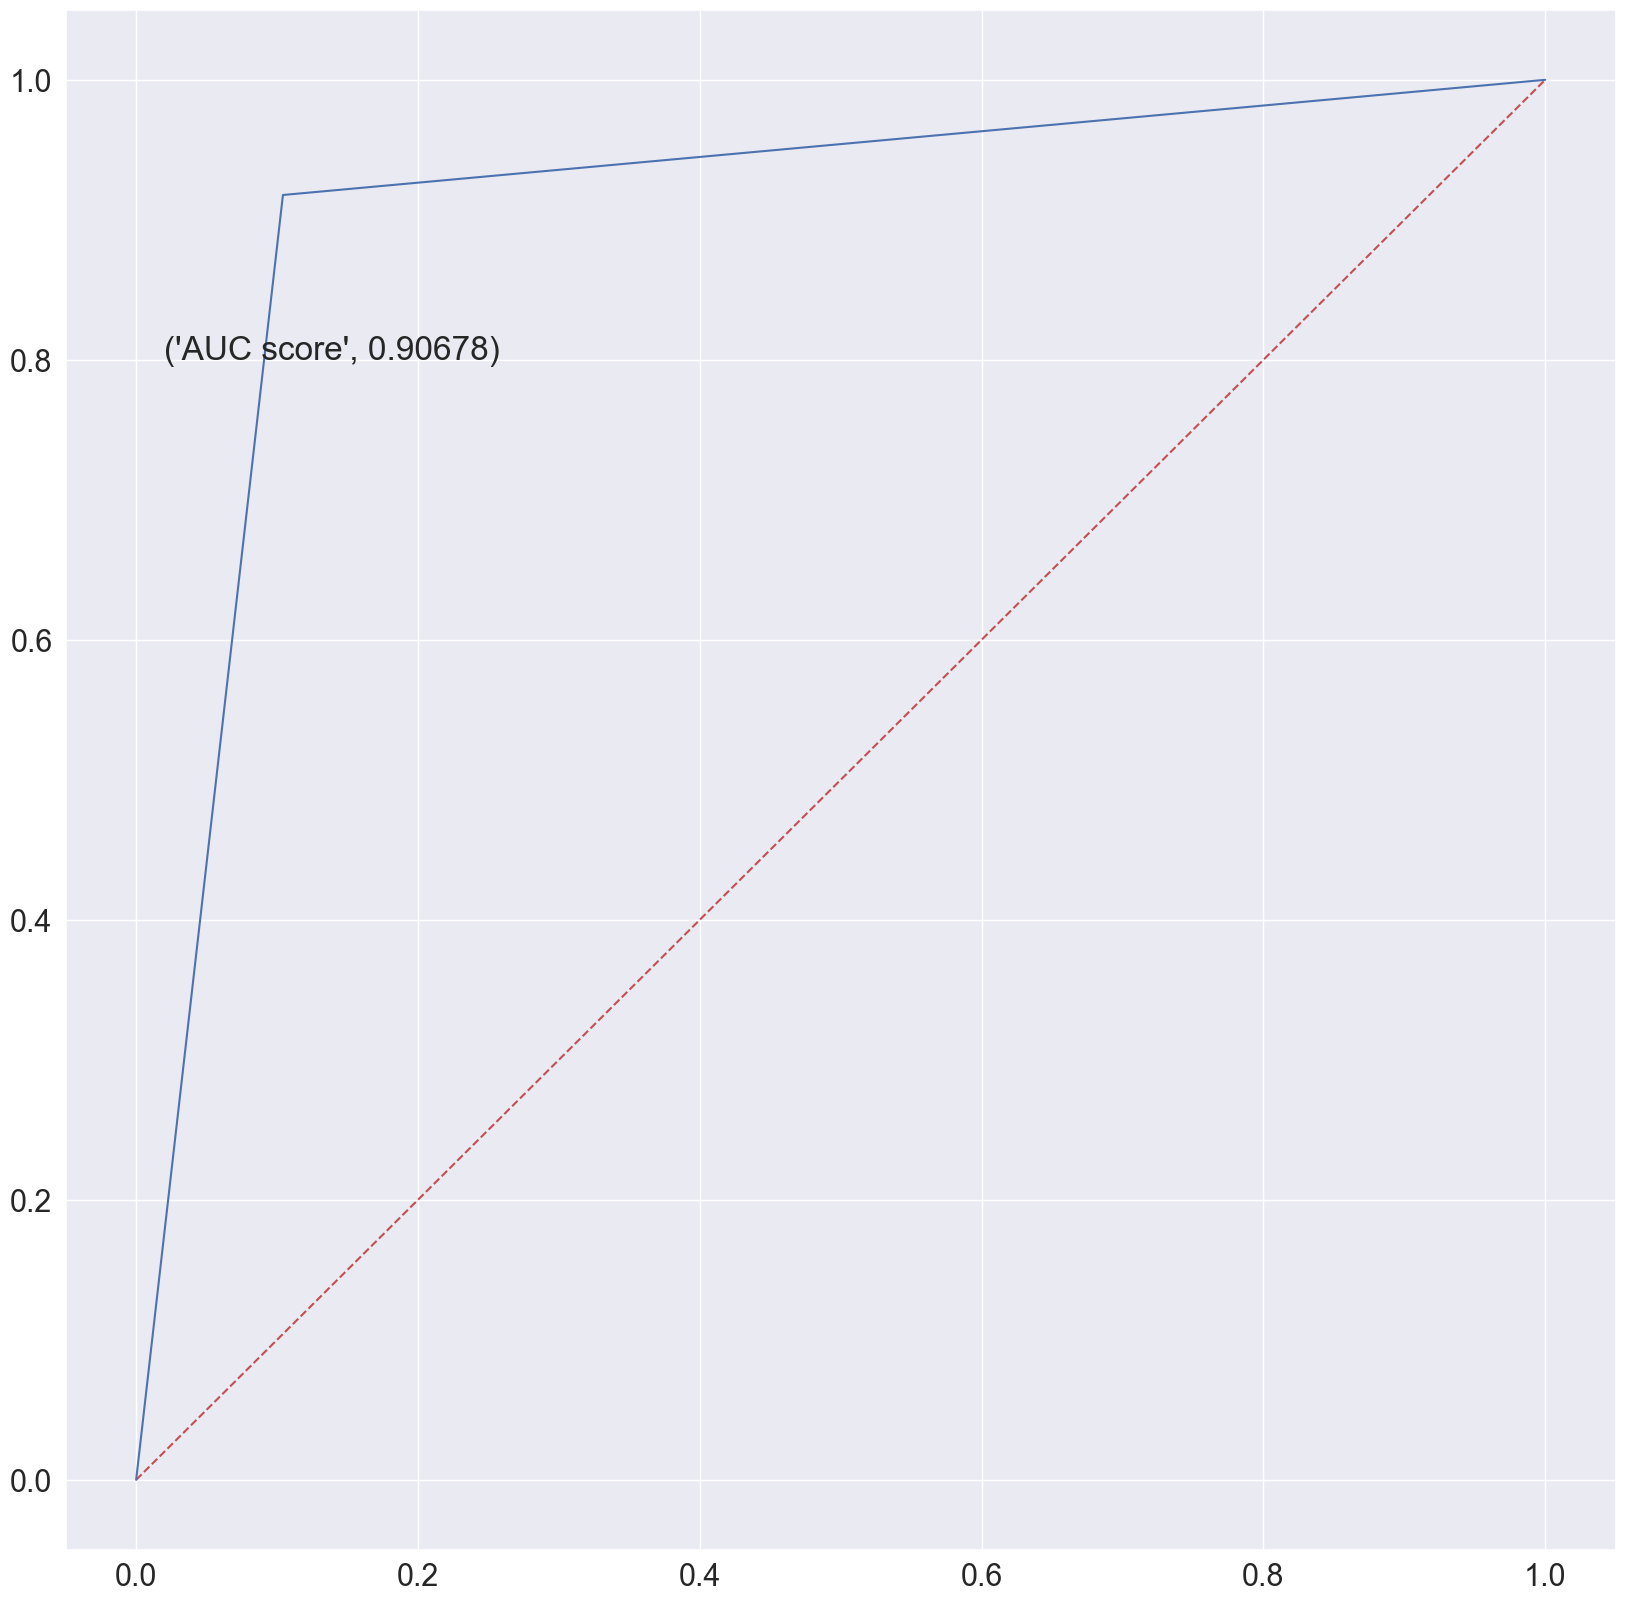

In [2447]:
draw_roc_auc_curve(gb_boost_tuned2,X_test_signi_gb2,y_test)

In [2448]:
# we can see that auc_roc_score is 89.32% which improve from the base model
# Also other matrix is score look good and consist
# SMOTE analysis help us to improve the overall performance but it create synthetic data
# We can conclude the model with Gradient Boasting with hyperparamter is the best model

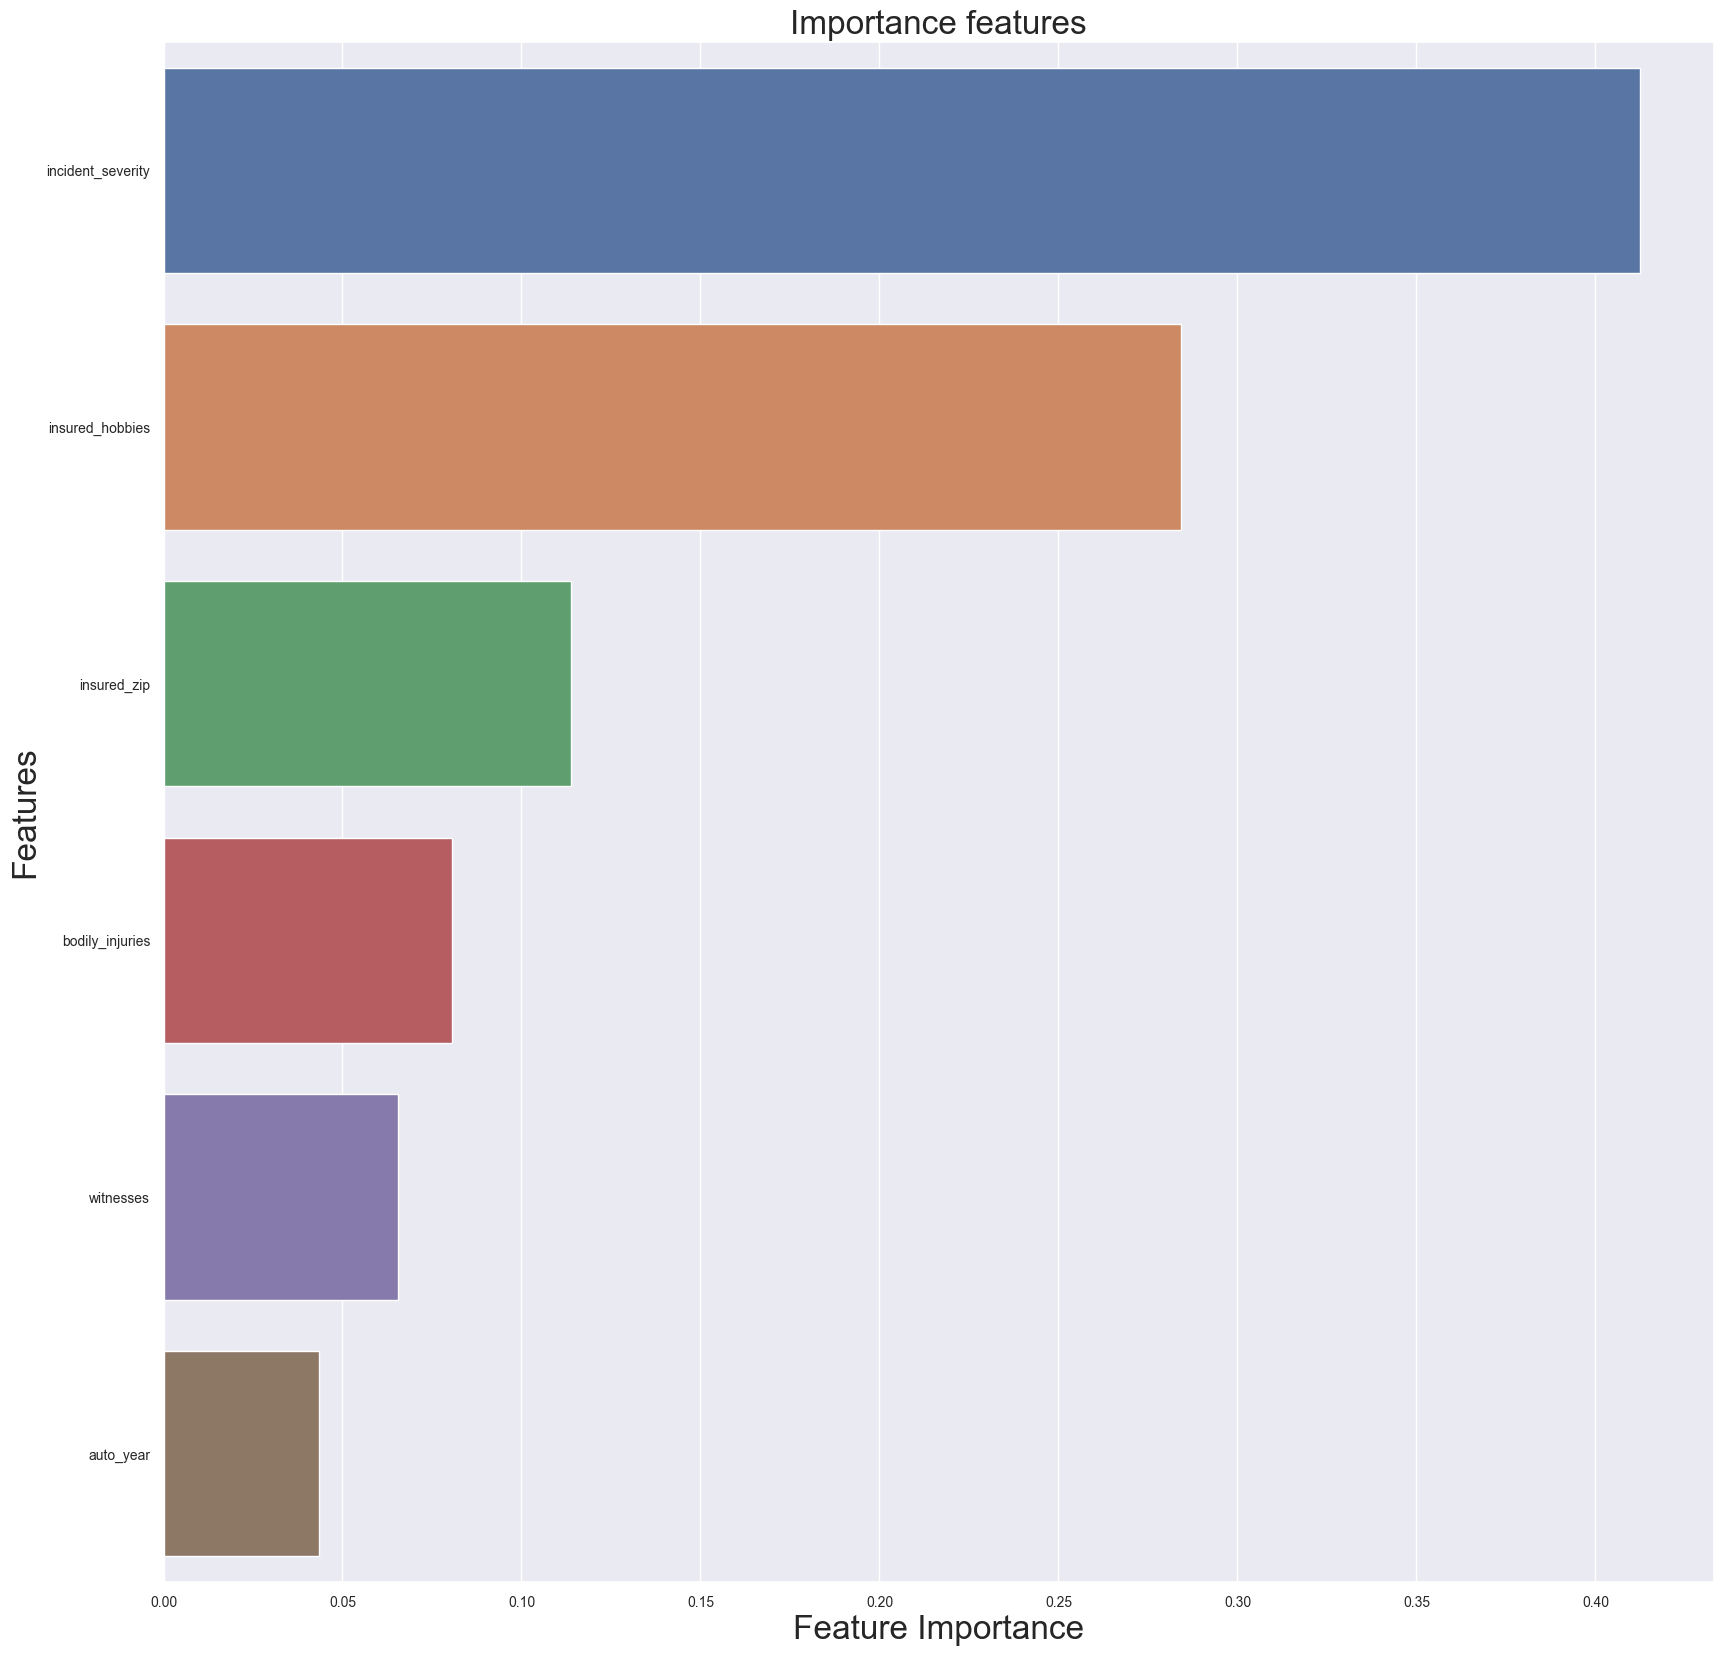

In [2449]:
df_feature_importance = pd.DataFrame({'Features':X_train_signi_gb2.columns,
                                      'Feature Importance':gb_boost_tuned2.feature_importances_})
df_feature_importance = df_feature_importance.sort_values(by='Feature Importance',ascending=False)
sns.barplot(data=df_feature_importance,x='Feature Importance',y='Features')
plt.title('Importance features')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [2450]:
# incident_severity is most important feature followed by insured_hobbies and bodily_injuries that help us to detemine the
# target column

In [2451]:
base_learners = [('Random Forest',RandomForestClassifier(n_estimators=200,max_depth=20,random_state=10)),
                ('Decision Tree',DecisionTreeClassifier(max_depth=10,random_state=3)),
                ('Ada Boosting',AdaBoostClassifier(learning_rate=1,random_state=2)),
                ('Gradient Boosting',GradientBoostingClassifier(learning_rate=0.1,random_state=3)),
                ('XGB Boosting',XGBClassifier(n_estimators=200,random_state=1)),
                ('KNN',KNeighborsClassifier(n_neighbors=3))]

#  {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}
skf = StratifiedKFold(n_splits=10)
stack_gb = StackingClassifier(estimators=base_learners,final_estimator=LogisticRegression(random_state=20)
                              ,cv=skf,passthrough=True,stack_method='predict')
stack_gb.fit(X_train_signi_gb2,y_train)
eval_metric(stack_gb,X_test_signi_gb2,y_test)

Accuracy Score :  0.9172185430463576
Recall Score :  0.9430379746835443
Precision Score : 0.9030303030303031
F1 Score :  0.9226006191950465
Cohen_kappa_score :  0.8337224155397964
Roc_auc_score :  0.9159634317862166
*************************************************************************
Confusion Matrix :
  [[128  16]
 [  9 149]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       144
           1       0.90      0.94      0.92       158

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302



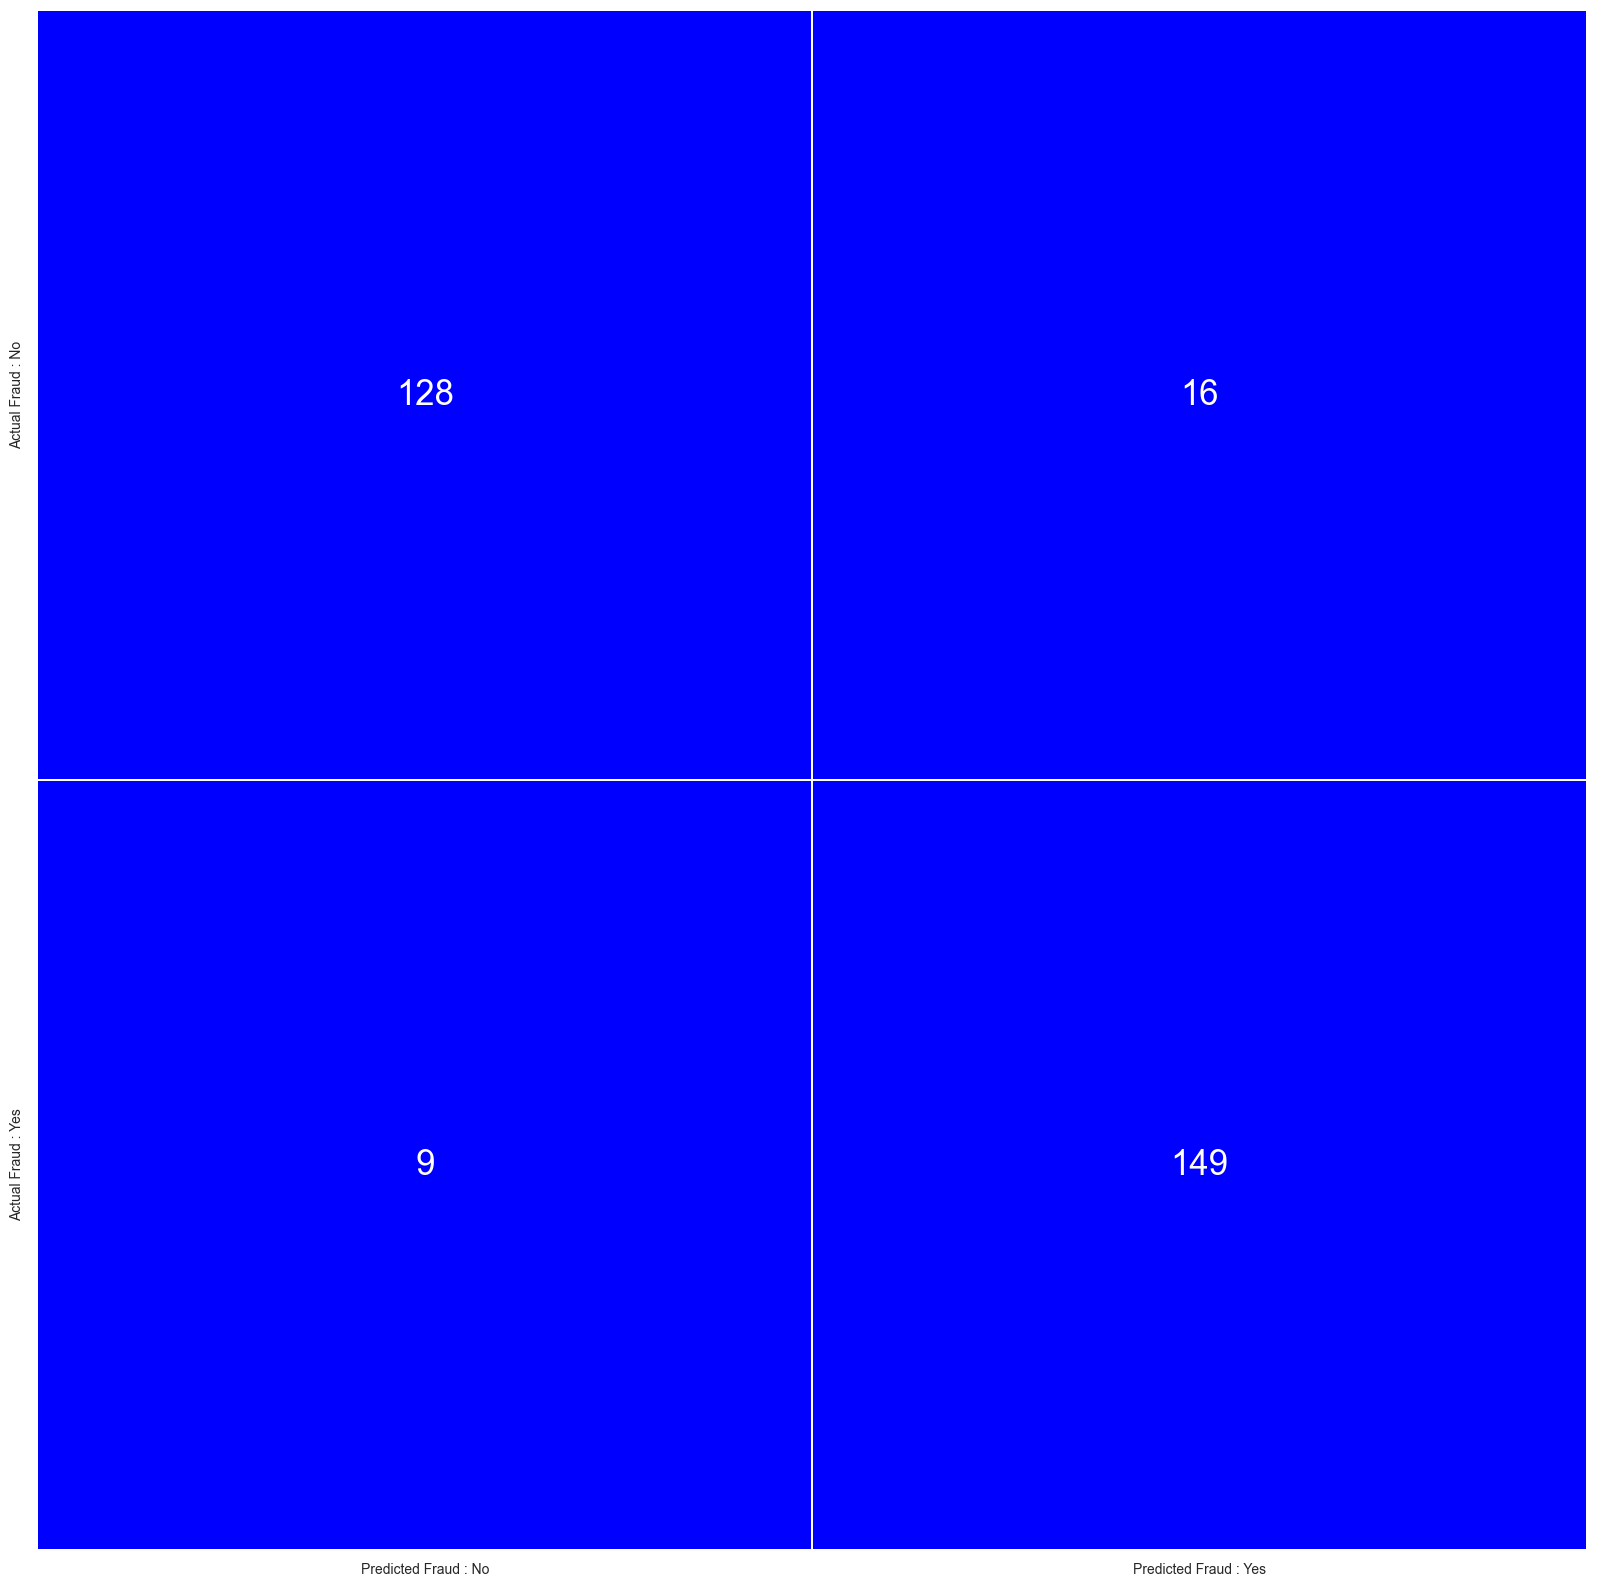

In [2452]:
# type your code here
draw_confusion_matrix(stack_gb,X_test_signi_gb2,y_test)

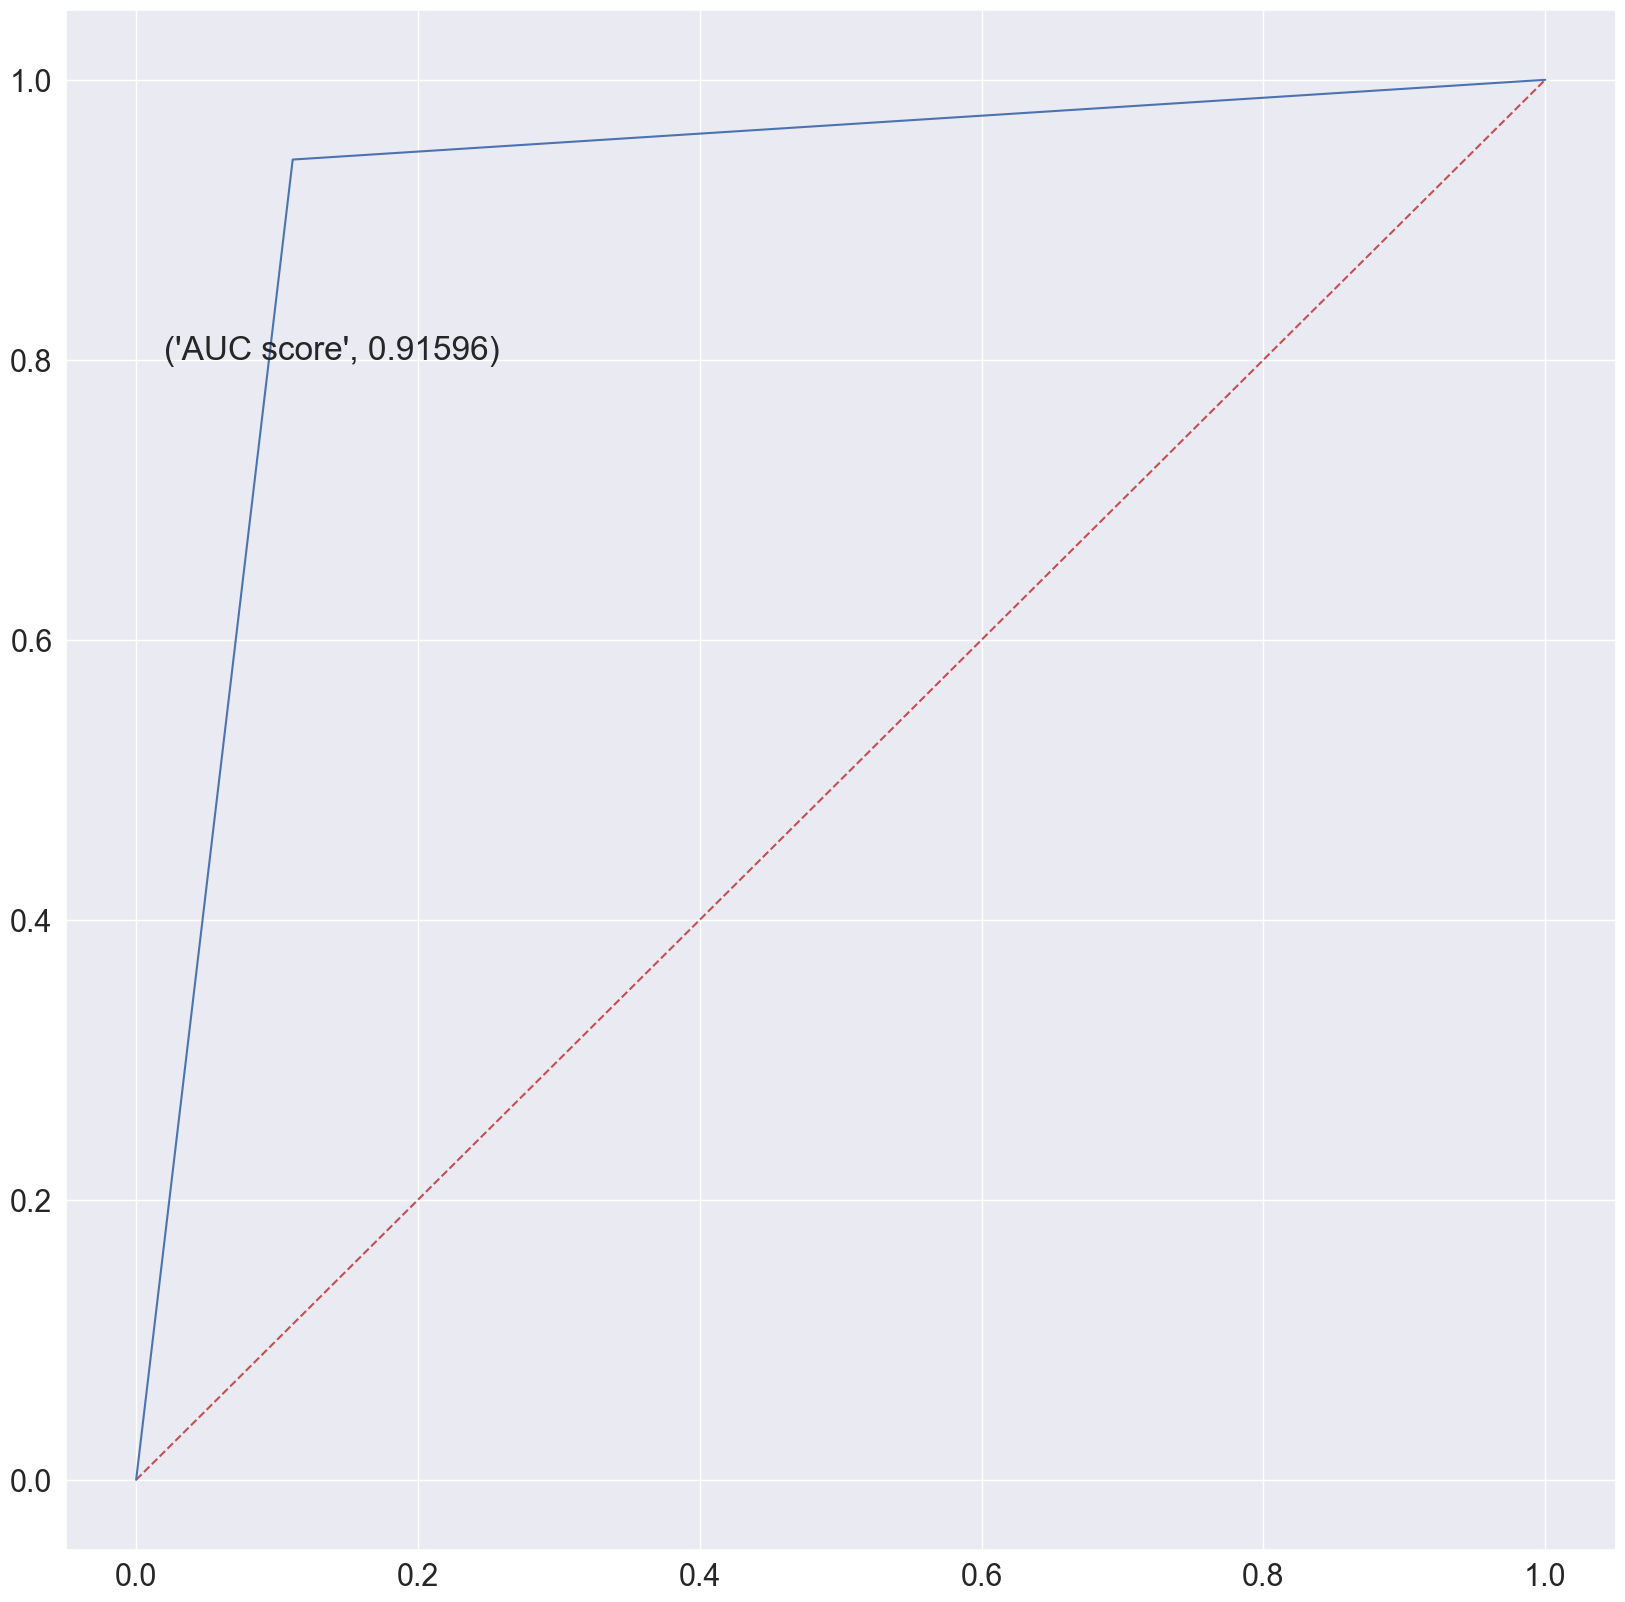

In [2453]:
draw_roc_auc_curve(stack_gb,X_test_signi_gb2,y_test)